# Első lépésként importáltam a szükséges osztály könyvtárakat 

In [116]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Ezután beolvastam seaborn-data a könyvtárból az mpg.csv állományt

In [117]:
data=pd.read_csv("mpg.csv",sep=",")

# Majd ellenőriztem az átvett adatokat

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


# Az adatsor autók városi üzemanyag fogyasztásának előrejelzésére szolgál 
Az attibútumok nevei sorban: 
mpg(mérföld per gallon),
cylinders (hengerek száma), 
displacement (űrtartalom), 
horsepower (lóerő), 
weight (súly), 
acceleration (gyorsulás), 
model year (gyártási év), 
origin (származás), 
name (autó neve). 
Az autók nevét többnyire nem használjunk, inkább a származásukat, ami a következő usa, europa, japan. 

In [118]:
data.shape

(398, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


# A következő lépésben megvizsgáltam hogy a van e üres mezőérték

In [8]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [9]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<AxesSubplot:>

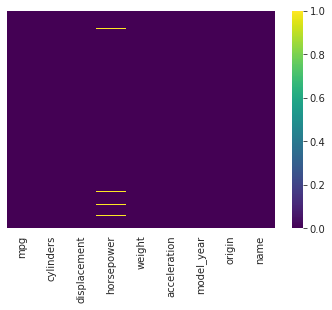

In [113]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [119]:
print("Hiányzó értékek a horspower mezőben:", 
      len(data[data['horsepower'].isnull()]))

Hiányzó értékek a horspower mezőben: 6


# Az üres mezőket tartalmazó rekordokat töröltem

In [120]:
data = data.dropna(how='any', axis=0)

<AxesSubplot:>

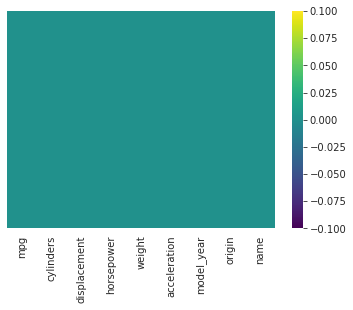

In [121]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [122]:
print("Hiányzó értékek a horspower mezőben:", 
      len(data[data['horsepower'].isnull()]))

Hiányzó értékek a horspower mezőben: 0


# Mostmár az adatkészletben nulla null érték található

In [15]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

# Eztkövetően megvizsgálta hogy van ismétlődő érték az adatszerkezetben

In [16]:
data.duplicated().sum()

0

# Azt találtam hogy nincs

# Ezután megvizsgáltam mezőnként, hogy melyik értékből mennyi van

In [17]:
data['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [18]:
data['model_year'].value_counts()

73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: model_year, dtype: int64

In [19]:
data['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [20]:
data["name"].nunique()

301

In [21]:
data["name"].value_counts().head(25)

amc matador                  5
ford pinto                   5
toyota corolla               5
toyota corona                4
amc hornet                   4
chevrolet chevette           4
chevrolet impala             4
amc gremlin                  4
peugeot 504                  4
ford maverick                4
ford gran torino             3
honda civic                  3
chevrolet caprice classic    3
dodge colt                   3
volkswagen dasher            3
plymouth duster              3
chevrolet citation           3
chevrolet nova               3
pontiac catalina             3
plymouth fury iii            3
ford galaxie 500             3
chevrolet vega               3
buick century                2
volkswagen rabbit            2
amc matador (sw)             2
Name: name, dtype: int64

# Azt találtuk, hogy az adatok name oszlopa nem hasznos a modell számára, mivel nagyon kevés autónév ismétlődik. Viszont ebből a mezőből hozzájuthatunk hasznos információkhoz is mint például az autó márkáját

In [22]:
data["name"].values[:10]

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl'], dtype=object)

# Láthatunk egy mintát ezek között a nevek között, ez az márka és típus között figyelhető meg, ezért minta alapján feladaraboltam őket.

In [23]:
data['marka'] = data["name"].str.extract('(^.*?)\s')
data["marka"].value_counts()[:30]

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
vw                6
chrysler          6
volvo             6
opel              4
saab              4
chevy             3
renault           3
maxda             2
subaru            2
bmw               2
mercedes-benz     2
cadillac          2
triumph           1
Name: marka, dtype: int64

# Mivel néhány márkanév különböző betűkkel ismétlődik, de különböző betűkkel (chevrolet-chevy-chevroelt) ezért ezeket javítottam

In [24]:
data['marka'] = data['marka'].replace(['volkswagen','vokswagen','vw'],'VW')
data['marka'] = data['marka'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
data['marka'] = data['marka'].replace('maxda','mazda')
data['marka'] = data['marka'].replace('toyouta','toyota')
data['marka'] = data['marka'].replace('mercedes','mercedes-benz')
data['marka'] = data['marka'].replace('nissan','datsun')
data['marka'] = data['marka'].replace('capri','ford')
data['marka'] = data['marka'].replace('nissan','datsun')

# Ellenőriztem, hogy a marka mezőben vannak a null értékek

In [25]:
data[data['marka'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marka
150,26.0,4,108.0,93.0,2391,15.5,74,japan,subaru,NaN
346,32.3,4,97.0,67.0,2065,17.8,81,japan,subaru,NaN


# Azt találtam hogy két ilyen mezőérték van. Ezeket feltöltöttem az autók nevivel

In [26]:
data['marka'].fillna(value = 'subaru',inplace=True) 

In [27]:
data["marka"]=data["marka"].str.capitalize()

In [28]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marka
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,Chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,Buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,Plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,Amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,Ford


# Ploting Pair Plots ábrázolása az adatkészletben lévő esetleges kiugró értékek megjelenítéséhez használtam

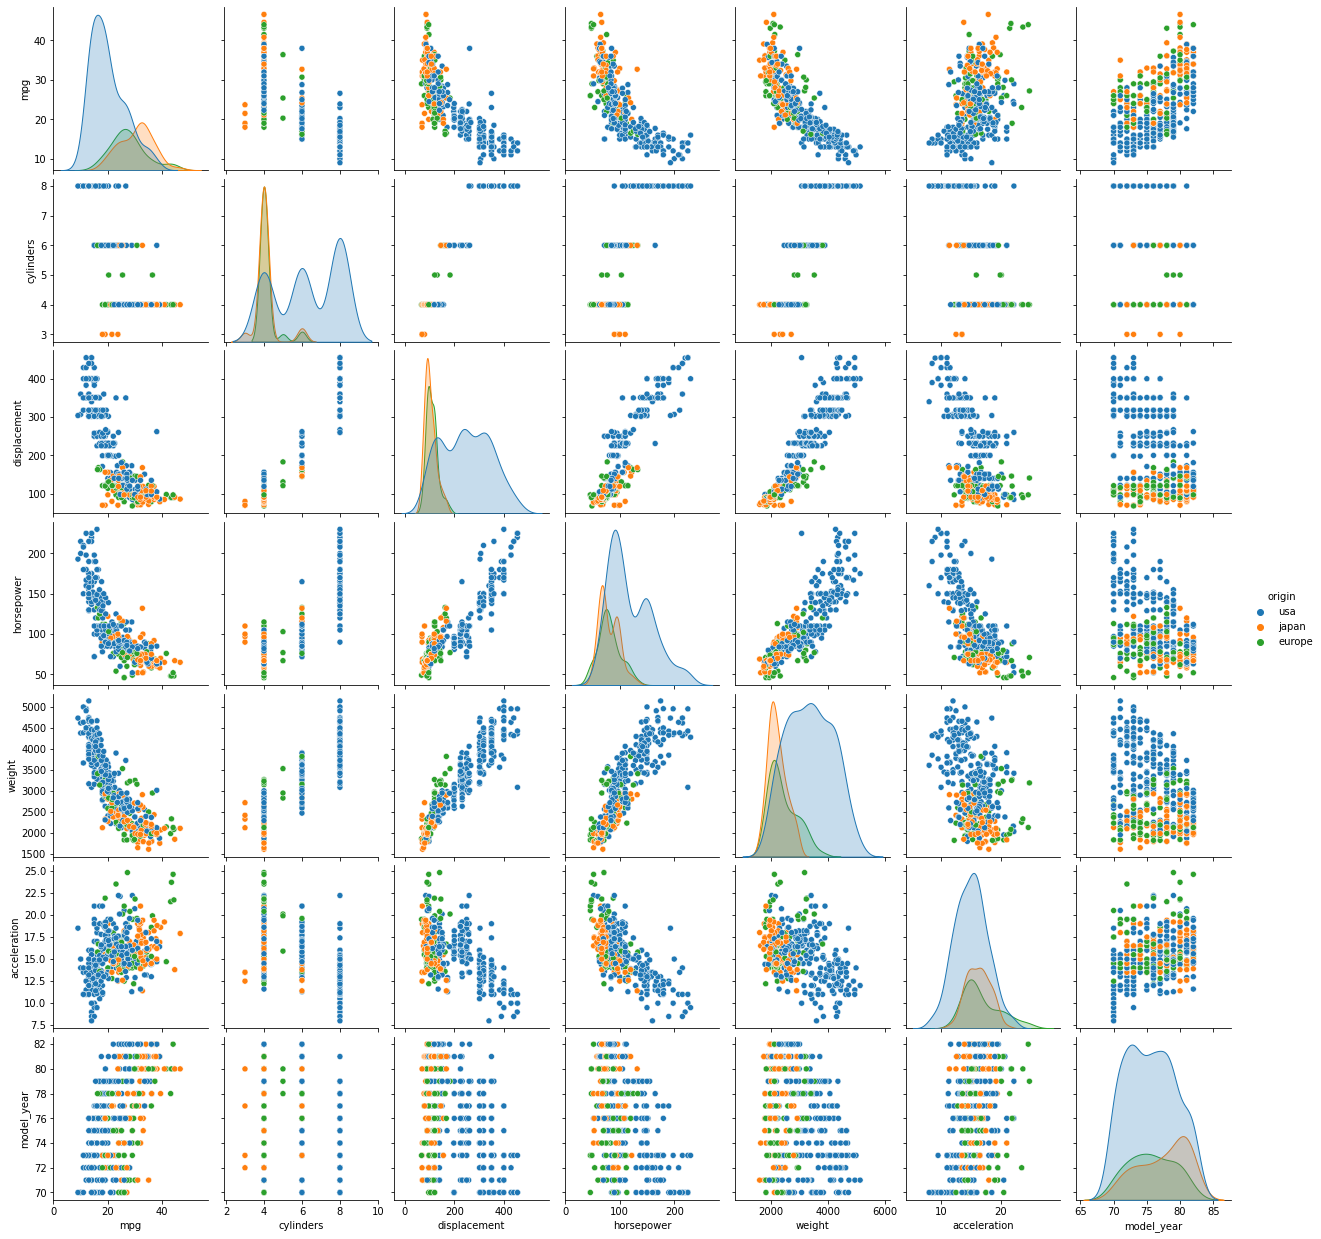

In [29]:
sns.pairplot(data,hue="origin")

# A lóerő eloszlása minden autóra

<AxesSubplot:>

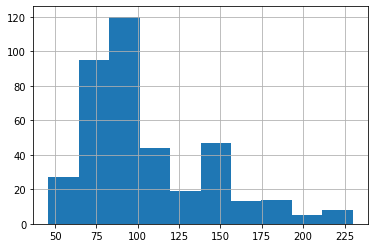

In [30]:
data["horsepower"].hist()

In [31]:
print("minimum érték: {} Le\nmaximum érték : {} Le".format(data["horsepower"].min(),data.horsepower.max()))

minimum érték: 46.0 Le
maximum érték : 230.0 Le


<AxesSubplot:>

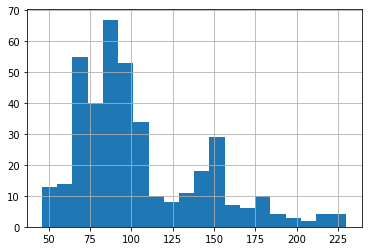

In [32]:
data["horsepower"].hist(bins=20)

# Márkák száma az egyes származási helyekről

In [33]:
plt.figure(figsize=(20,8))
brands_USA=data[data["origin"]=="usa"]["marka"]
brands_Europe=data[data["origin"]=="europe"]["marka"]
brands_Japan=data[data["origin"]=="japan"]["marka"]
brand_origin=pd.DataFrame([["usa",brands_USA.nunique()],["europe",brands_Europe.nunique()],["japan",brands_Japan.nunique()]],
                          columns=["Origin Country","Total no. of brands"])
brand_origin

,Origin Country,Total no. of brands
0,usa,12
1,europe,11
2,japan,5


<Figure size 1440x576 with 0 Axes>

# Egyedi auto nevek száma száma

<AxesSubplot:>

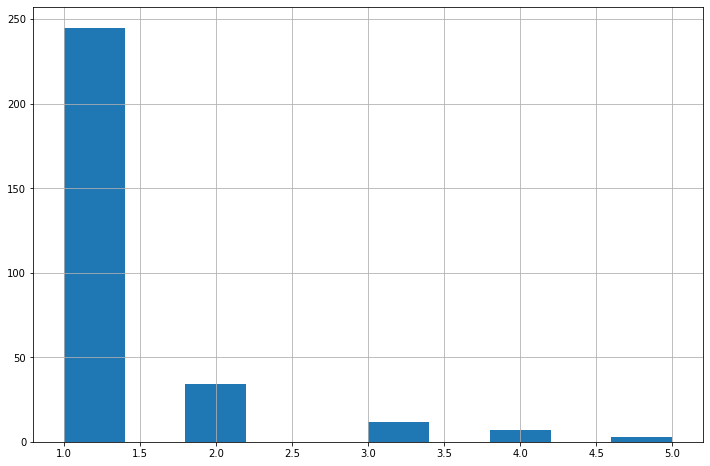

In [34]:
plt.figure(figsize=(12,8))
data["name"].value_counts().hist()

In [35]:
data["name"].nunique()

301

# A legtöbb auto név egyedi. Tehát ebben az oszlopban nincs hasznos információ számunkra. Töröltem ezt az oszlopt

In [36]:
data.drop("name",axis=1,inplace=True)

# Az adatok korrelációja

In [37]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [38]:
sns.set_palette("bright")

In [39]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,marka
0,18.0,8,307.0,130.0,3504,12.0,70,usa,Chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,Buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,Plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,Amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,Ford


# Az egyes származási helyekhez (országokhoz) tartozó autók száma 

usa
europe
japan

<AxesSubplot:title={'center':'Autok száma hengerek száma országok szerint'}, xlabel='origin', ylabel='count'>

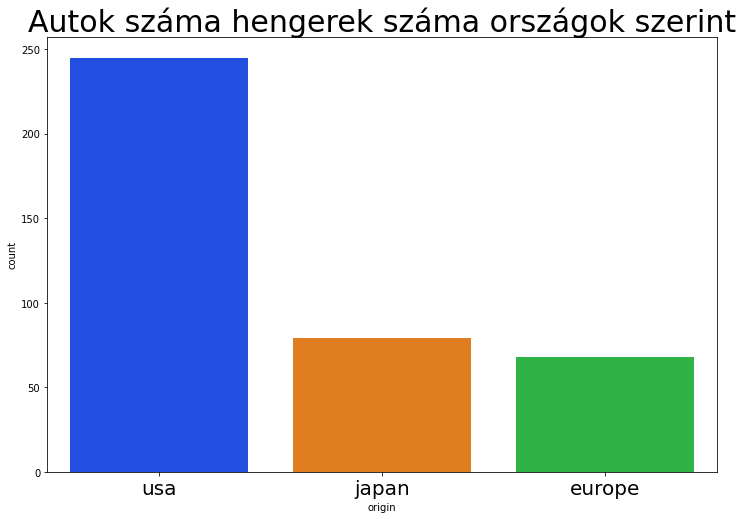

In [40]:
plt.figure(figsize=(12,8))
plt.title("Autok száma hengerek száma országok szerint",fontsize=30)
plt.xticks(fontsize=20)
sns.countplot(data["origin"])

# Az USA-ban van a legtöbb autó. Japan and Europe have almost same number of cars. Japánban és Európában közel azonos számú autó van


# Az autok száma hengerek száma szerint

<AxesSubplot:title={'center':'Autok száma hengerek száma szerint'}, xlabel='cylinders', ylabel='count'>

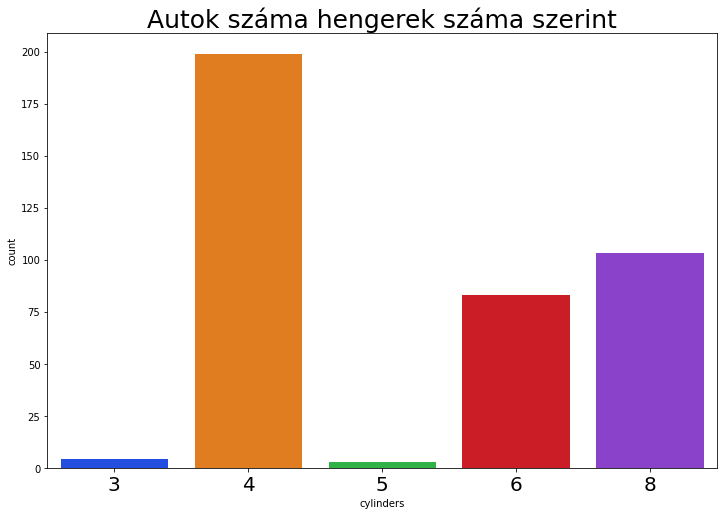

In [41]:
plt.figure(figsize=(12,8))
plt.title("Autok száma hengerek száma szerint",fontsize=25)
plt.xticks(fontsize=20)
sns.countplot(data["cylinders"])

# A 4 hengeres autókból van a legtöbb autó, A 3 és 5 hengeresekből viszont a legkevesebb.

# Autok száma hengerek száma szerint minden országba

<AxesSubplot:title={'center':'Autok száma hengerek száma szerint minden országba'}, xlabel='cylinders', ylabel='count'>

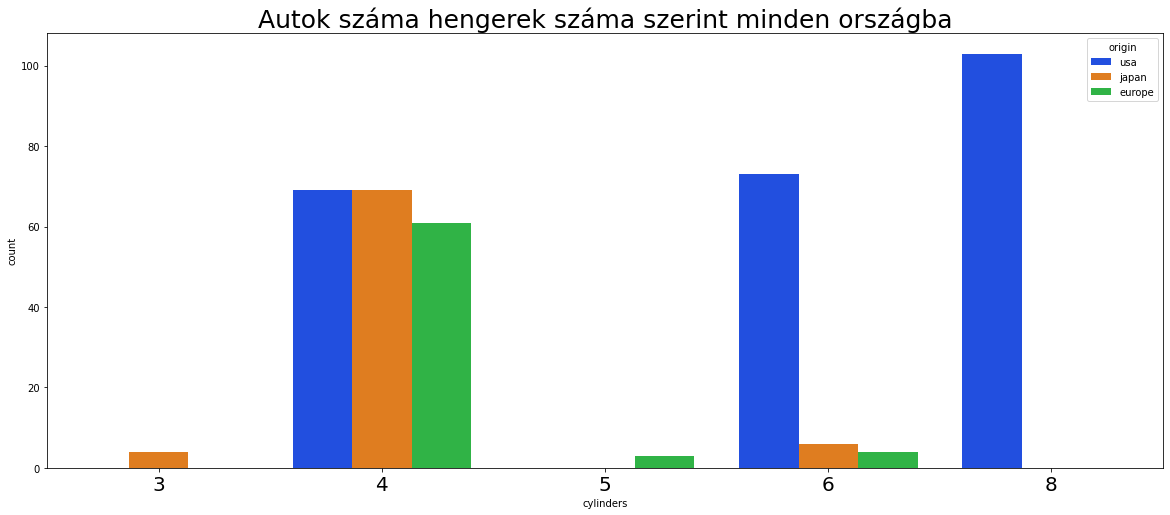

In [42]:
plt.figure(figsize=(20,8))
plt.title("Autok száma hengerek száma szerint minden országba",fontsize=25)
plt.xticks(fontsize=20)
sns.countplot(x="cylinders",data=data,hue="origin")

# Csak az USA autóiban jellemző a 8 henger. Japan autók között van 3 hengeres, az európai autók között pedig 5 hengeresek. 

# A hengerek leggyakoribb száma 4

# Autok száma évjárattól függően

<AxesSubplot:title={'center':'Autok száma évjárattól függően'}, xlabel='model_year', ylabel='count'>

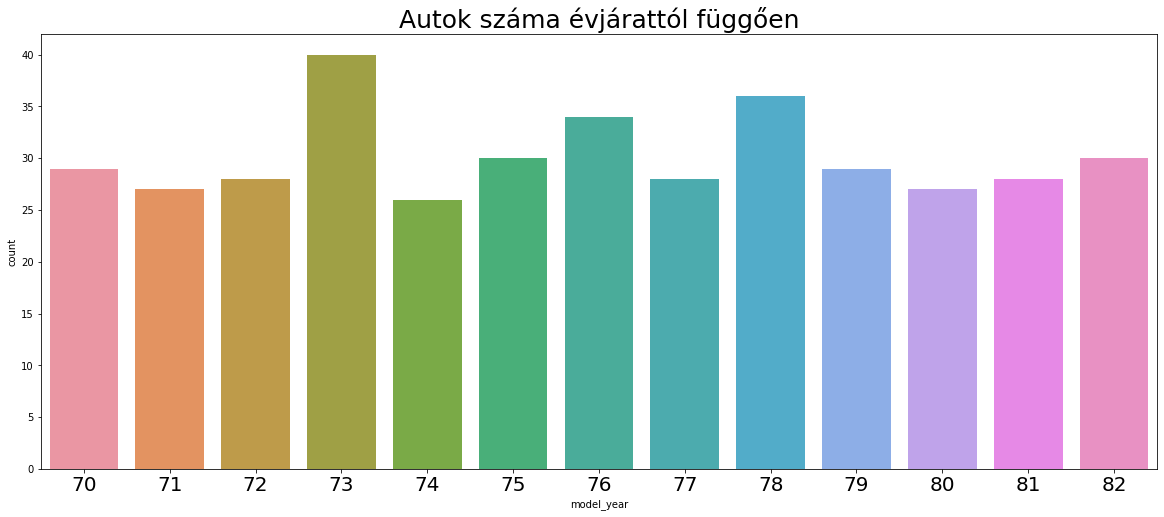

In [43]:
plt.figure(figsize=(20,8))
plt.title("Autok száma évjárattól függően",fontsize=25)
plt.xticks(fontsize=20)

sns.countplot(data["model_year"])

# A 73-as évjáratú autókból van a legtöbb autó, de a többi évjárat is hasonló eloszlású


# Autok száma márkától függően

<AxesSubplot:title={'center':'Autok száma márkától függően'}, xlabel='marka', ylabel='count'>

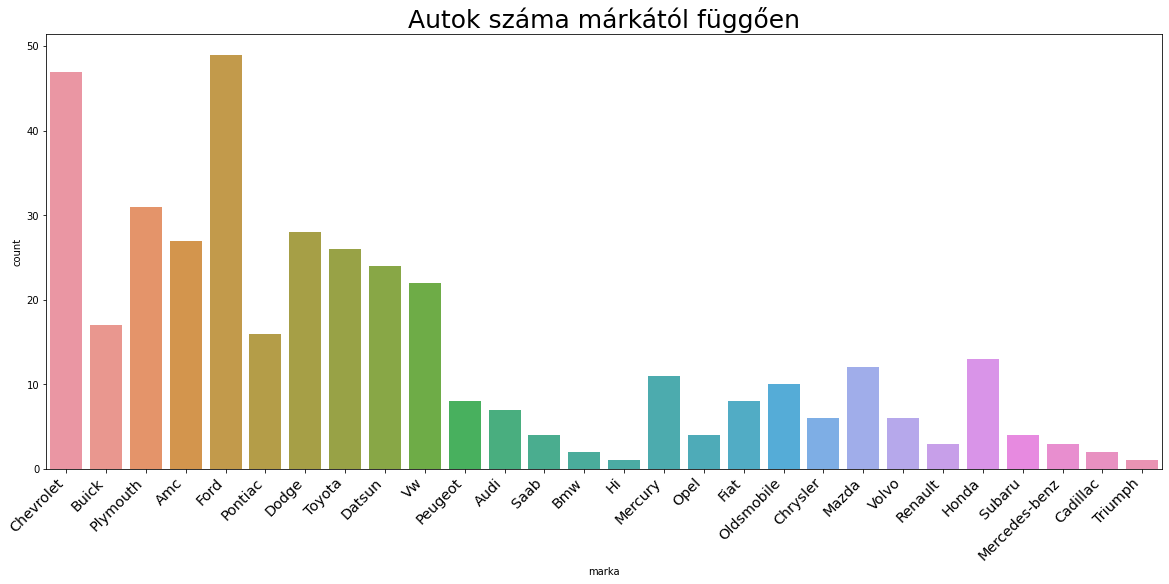

In [44]:
plt.figure(figsize=(20,8))
plt.title("Autok száma márkától függően",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')

sns.countplot(data["marka"])

# A Fordnak van a legtöbb autója, ezt követi a Chevrolet. A Hi és Triumph rendelkezik a legkevesebb autóval

# Márkák száma száramzási heytől függően

<AxesSubplot:title={'center':'Márkák száma száramzási heytől függően'}, xlabel='Origin Country', ylabel='Total no. of brands'>

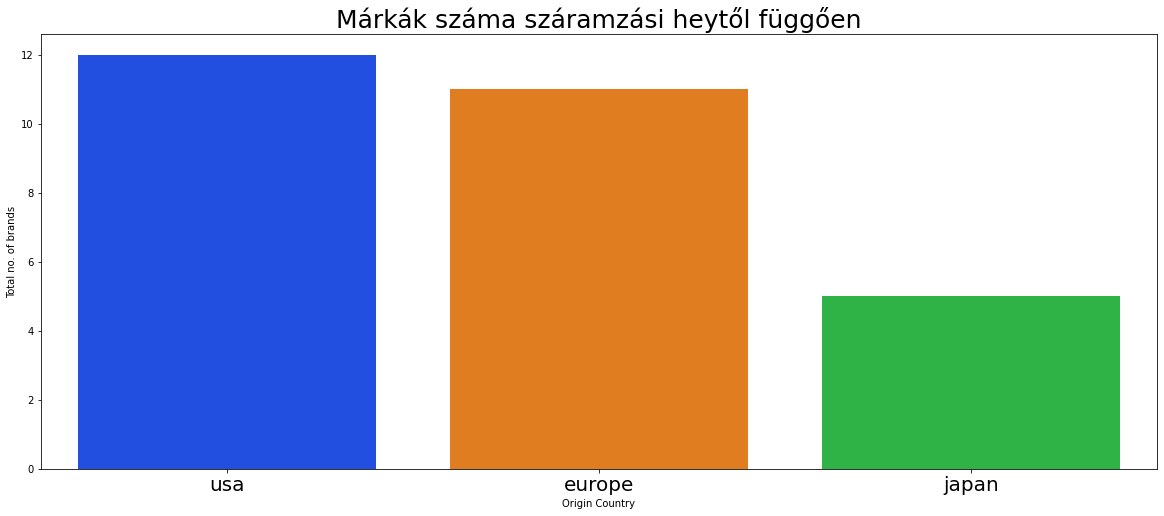

In [45]:
plt.figure(figsize=(20,8))
plt.title("Márkák száma száramzási heytől függően",fontsize=25)
plt.xticks(fontsize=20)

sns.barplot(data=brand_origin ,x="Origin Country",y="Total no. of brands")

# Az USA-ban és Európában közel azonos számú márka van. Japánnak csak 5 márka van

# Autok száma márkától függően az első 20 legnagyobb mpg-vel"

<AxesSubplot:title={'center':'Autok száma márkától függően Az első 20 legnagyobb mpg-vel'}, xlabel='marka', ylabel='count'>

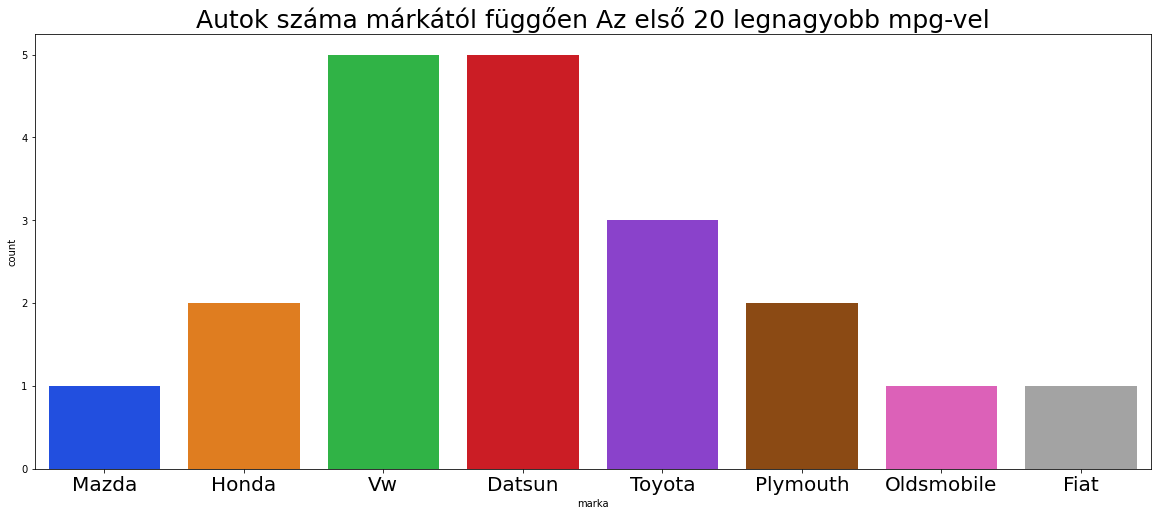

In [46]:
plt.figure(figsize=(20,8))
plt.title("Autok száma márkától függően Az első 20 legnagyobb mpg-vel",fontsize=25)
plt.xticks(fontsize=20)

sns.countplot(data.sort_values(by="mpg",ascending=False)["marka"][:20])

# A Volkswagennek és a datsunnak 5 autója van a 20 legkedvezőbb mpgértékkel

# MPG érték hengerek számától függően

<AxesSubplot:title={'center':'MPG érték hengerek számától függően'}, xlabel='cylinders', ylabel='mpg'>

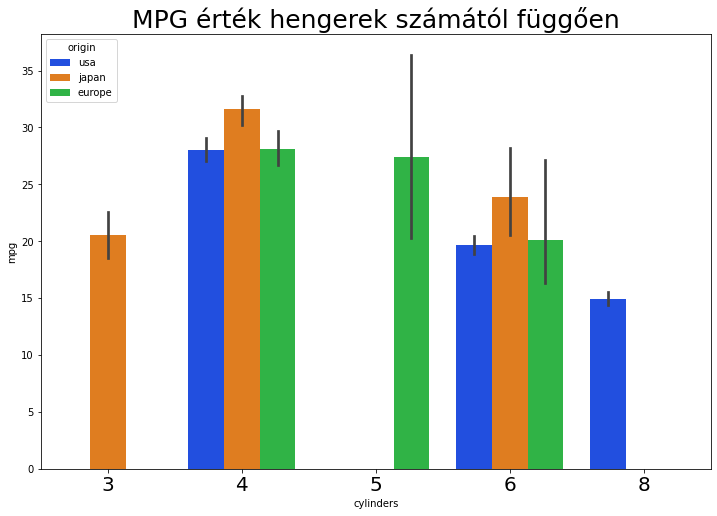

In [47]:
plt.figure(figsize=(12,8))
plt.title("MPG érték hengerek számától függően",fontsize=25)
plt.xticks(fontsize=20)
sns.barplot(x="cylinders",y="mpg",data=data,hue="origin")

# A 8 hengeres autóknak van a legkgyengébb az átlagos mpg értéke. Az USA összességében gyenge az átlagos mpg értéket tekintve

# MPG érték évjárattól függően

<AxesSubplot:title={'center':'MPG érték évjárattól függően'}, xlabel='model_year', ylabel='mpg'>

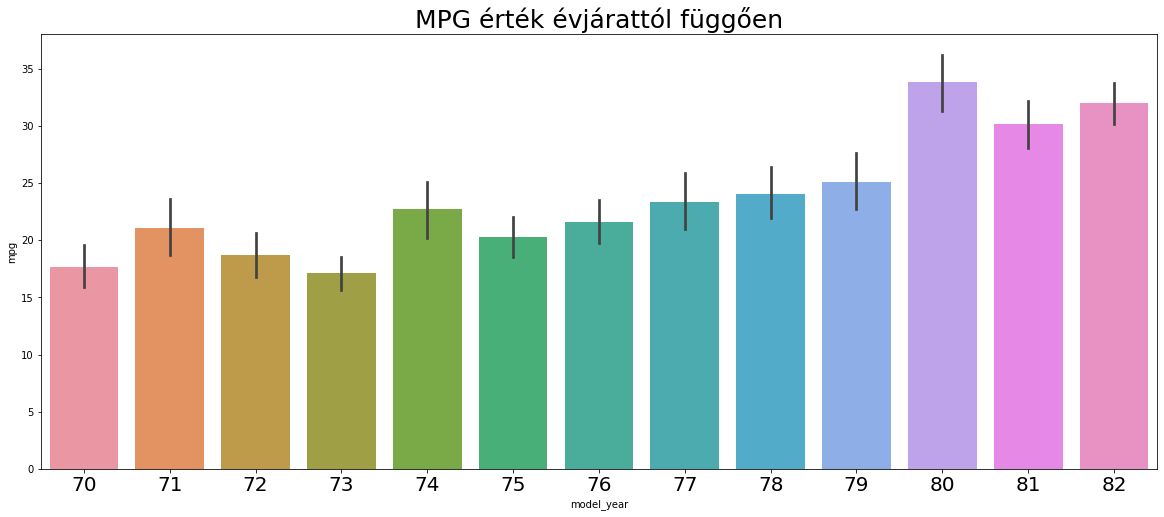

In [48]:
plt.figure(figsize=(20,8))
plt.title("MPG érték évjárattól függően",fontsize=25)
plt.xticks(fontsize=20)
sns.barplot(y="mpg",x="model_year",data=data)

# A 80-as évjáratú autók rendelkeznek a legmagasabb átlagos MPG értékkel

# MPG érték évjárattól függően származási helyenként

<AxesSubplot:title={'center':'MPG érték évjárattól függően származási helyenként'}, xlabel='model_year', ylabel='mpg'>

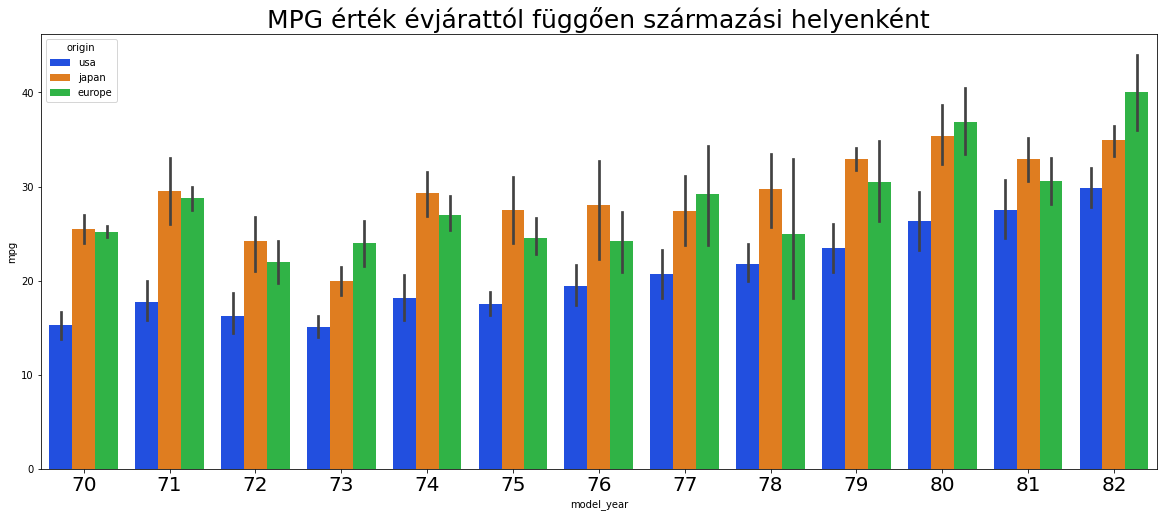

In [49]:
plt.figure(figsize=(20,8))
plt.title("MPG érték évjárattól függően származási helyenként",fontsize=25)
plt.xticks(fontsize=20)
sns.barplot(x="model_year",y="mpg",data=data,hue="origin")

# Amint látjuk, az átlagos mpg értékek egyértelműen javultak az évek múlásával. A japán autóknál a legjobb a legmagasabb átlag minden évben. Az európai autók átlagos mpg-értéke sokat javult 82-ben

# Átlagos mpg érték minden márkára

<AxesSubplot:title={'center':'Átlagos mpg érték minden márkára'}, xlabel='marka', ylabel='mpg'>

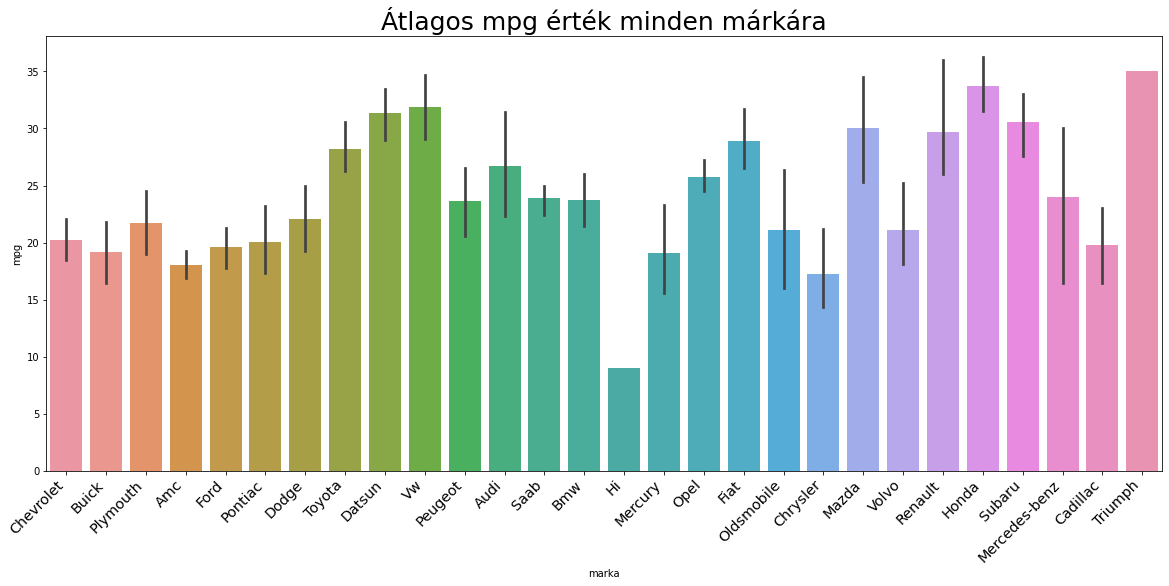

In [50]:
plt.figure(figsize=(20,8))
plt.title("Átlagos mpg érték minden márkára",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')


sns.barplot(x="marka",y="mpg",data=data)

# Maximum mpg érték minden márkára

<AxesSubplot:title={'center':'Maximum mpg érték minden márkára'}, xlabel='marka', ylabel='mpg'>

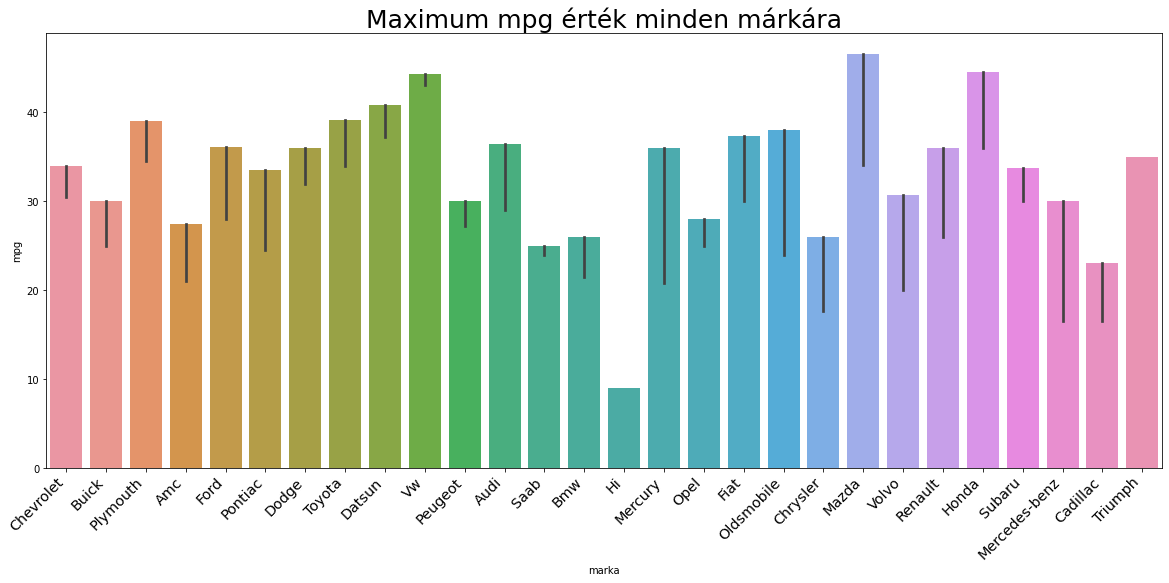

In [51]:
plt.figure(figsize=(20,8))
plt.title("Maximum mpg érték minden márkára",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')


sns.barplot(x="marka",y="mpg",data=data,estimator=max)

# A Mazda autók rendelkeznek a legmagasabb átlagos mpg értékkel

# Autok szám márkától függően az első 20 legjobban gyorsuló

<AxesSubplot:title={'center':'Autok szám márkától függően az első 20 legjobban gyorsuló'}, xlabel='marka', ylabel='count'>

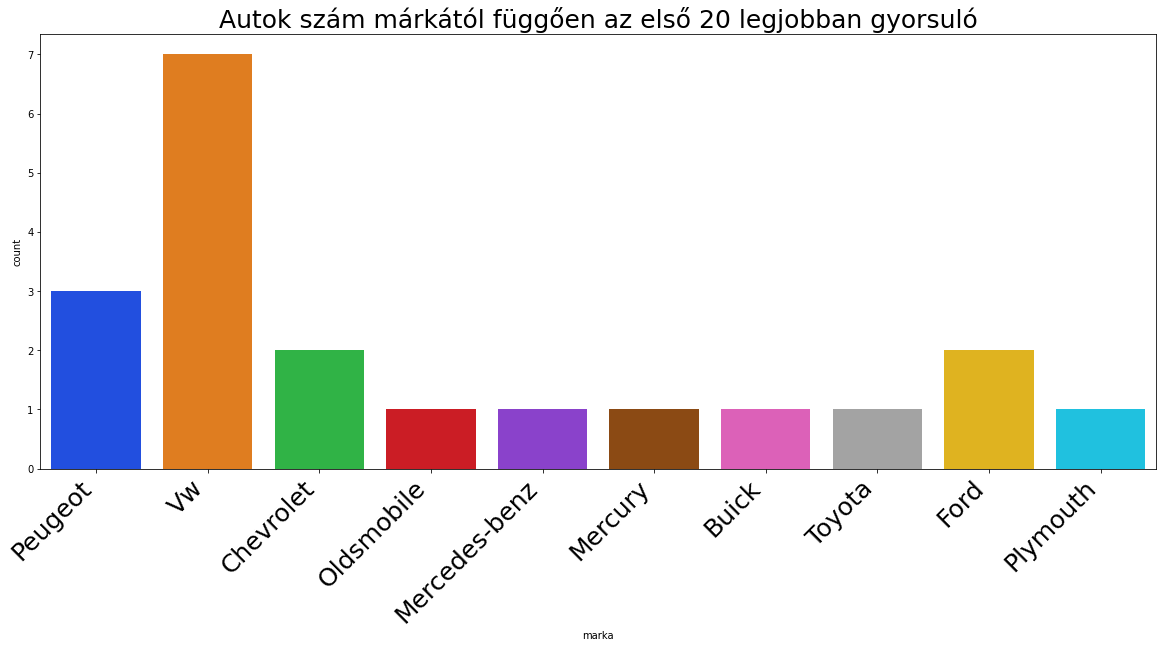

In [52]:
plt.figure(figsize=(20,8))
plt.title("Autok szám márkától függően az első 20 legjobban gyorsuló",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=25)

sns.countplot(data.sort_values(by="acceleration",ascending=False)["marka"][:20])

# A Volkswagennél rendelkezik a legtöbb autóval ami a 20 legjobb gyorsulású autók között

# Mpg értékek átlaga származásihely szerint¶

<AxesSubplot:title={'center':'Átlagos mpg érték származási helytől függően'}, xlabel='origin', ylabel='mpg'>

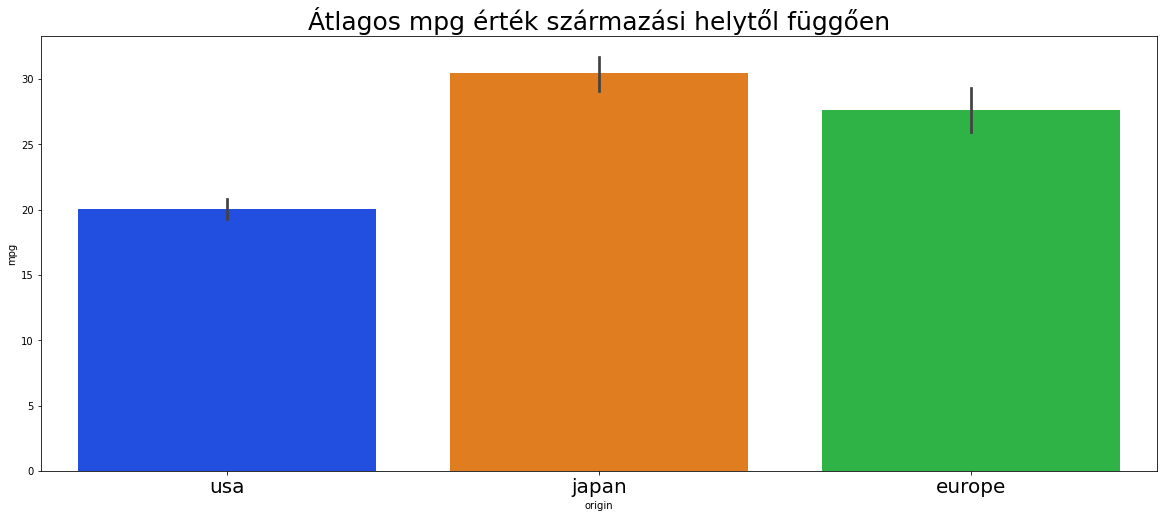

In [53]:
plt.figure(figsize=(20,8))
plt.title("Átlagos mpg érték származási helytől függően",fontsize=25)
plt.xticks(fontsize=20)
sns.barplot(y="mpg",x="origin",data=data)

# Japánban a legjobb az átlagos mpg-érték, az USA-ban pedig a legrosszabb

# Plots numerikus jellemzők számára

# MPG értékek eloszlása

<AxesSubplot:title={'center':'MPG értékek eloszlása'}, xlabel='mpg', ylabel='Density'>

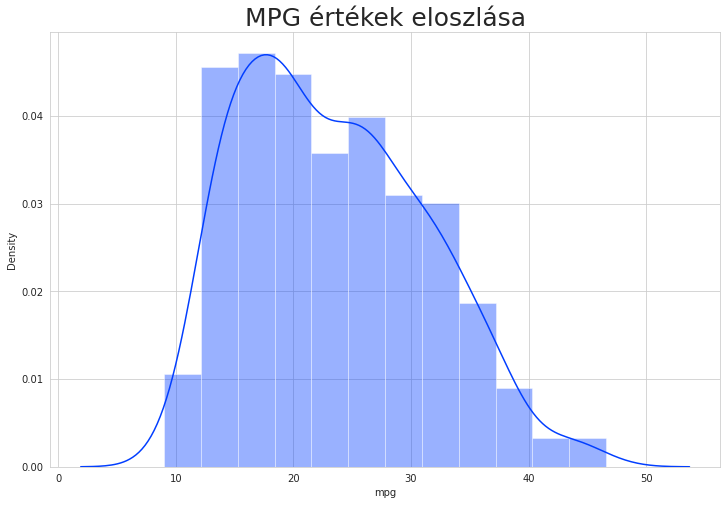

In [54]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,8))
plt.title("MPG értékek eloszlása",fontsize=25)

sns.distplot(data["mpg"])

# A súly eloszlása

<AxesSubplot:title={'center':'A súly eloszlása'}, xlabel='weight', ylabel='Density'>

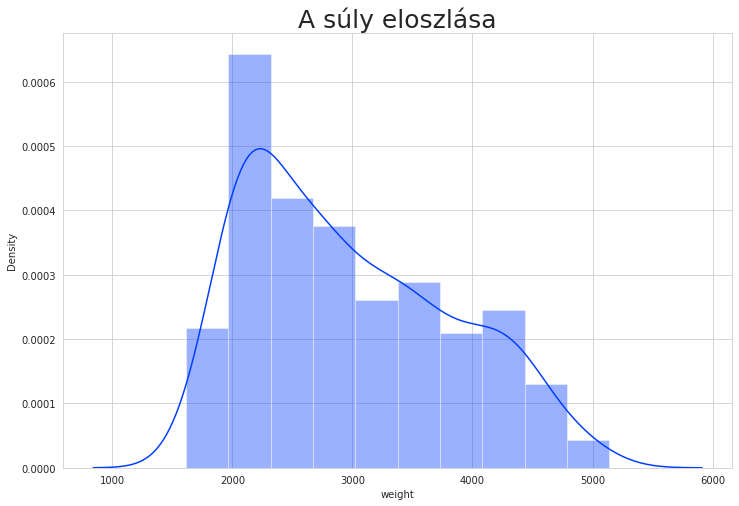

In [55]:
plt.figure(figsize=(12,8))
plt.title("A súly eloszlása",fontsize=25)

sns.distplot(data["weight"])

# Az autók gyorsulásának megoszlása

<AxesSubplot:title={'center':'Az autók gyorsulásának megoszlása'}, xlabel='acceleration', ylabel='Density'>

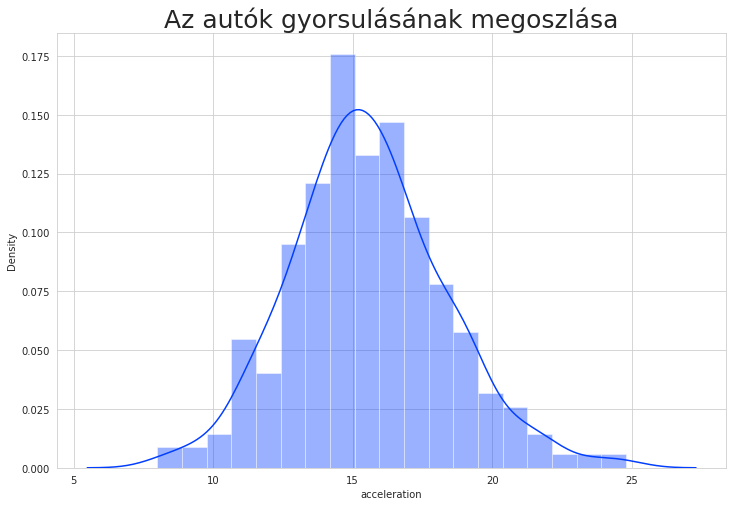

In [56]:
plt.figure(figsize=(12,8))
plt.title("Az autók gyorsulásának megoszlása",fontsize=25)

sns.distplot(data["acceleration"])

# Az autók lóerő eloszlása

<AxesSubplot:title={'center':'Az autók lóerő eloszlása'}, xlabel='horsepower', ylabel='Density'>

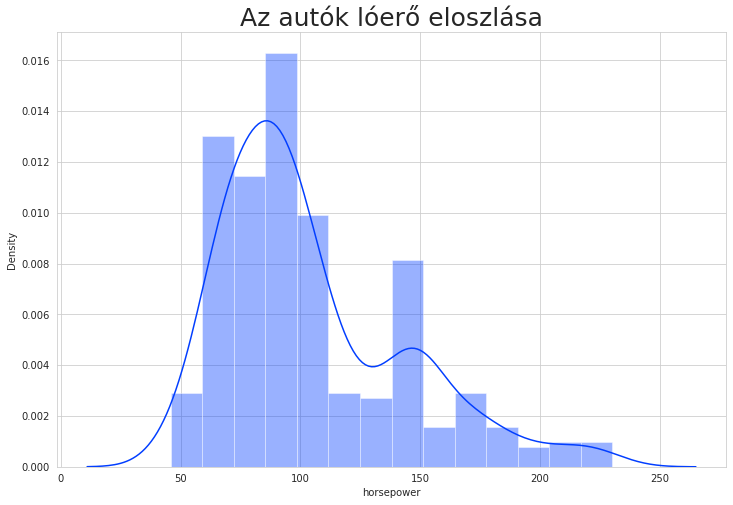

In [57]:
plt.figure(figsize=(12,8))
plt.title("Az autók lóerő eloszlása",fontsize=25)

sns.distplot(data["horsepower"])

# Az autók űrtartalmának eloszlása

<AxesSubplot:title={'center':'Az autók űrtartalmának eloszlása'}, xlabel='displacement', ylabel='Density'>

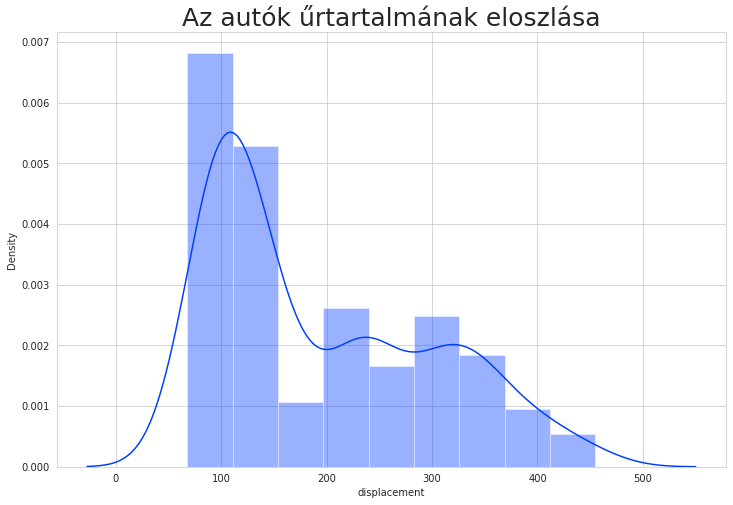

In [58]:
plt.figure(figsize=(12,8))
plt.title("Az autók űrtartalmának eloszlása",fontsize=25)

sns.distplot(data["displacement"])

2. Joint plots

# Mpg vs Űrtartalom

<Figure size 864x576 with 0 Axes>

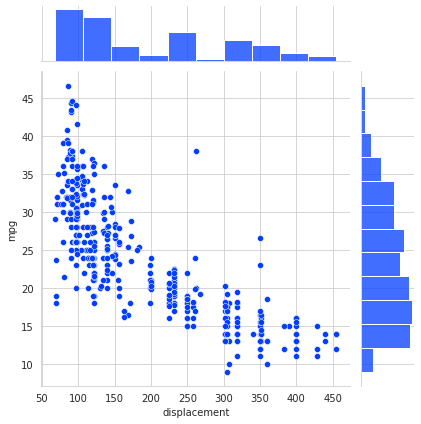

In [59]:
plt.figure(figsize=(12,8))
sns.jointplot("displacement","mpg",data)

# Mpg vs Lóerő

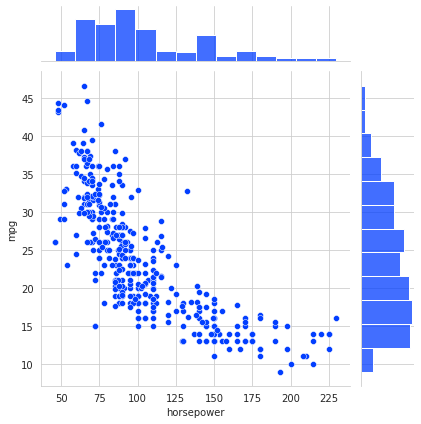

In [60]:
sns.jointplot("horsepower","mpg",data)

# Mpg vs Súly

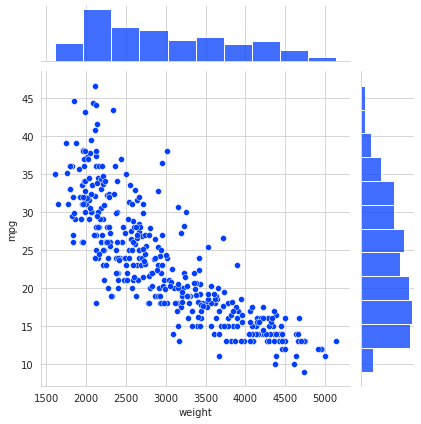

In [61]:
sns.jointplot("weight","mpg",data)

# Mpg vs Gyorsulás

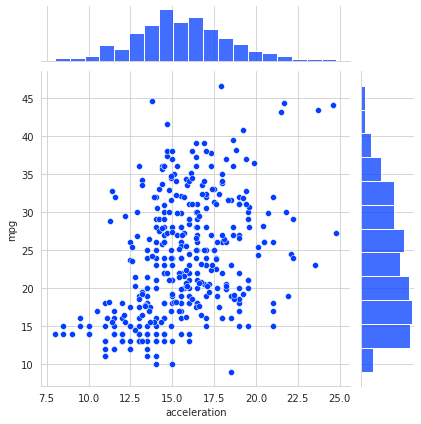

In [62]:
sns.jointplot("acceleration","mpg",data)

# Ahogy látjuk, az MPG értéke csökken, ahogy növeljük az autó súlyát, hengerűrtartalmát vagy lóerőit. Az Mpg érték csak kismértékben nő, ha növeljük az autó gyorsulását

# MPG vs Származási hely

<AxesSubplot:title={'center':'MPG érték származási helytől függően'}, xlabel='origin', ylabel='mpg'>

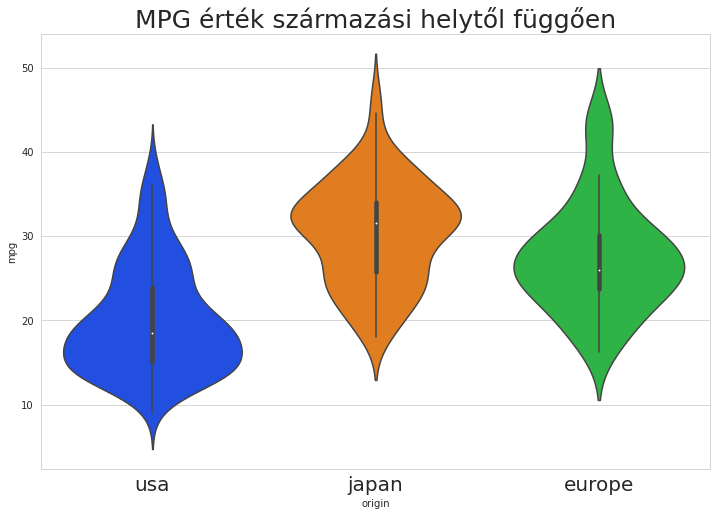

In [63]:
plt.figure(figsize=(12,8))
plt.title("MPG érték származási helytől függően",fontsize=25)
plt.xticks(fontsize=20)

sns.violinplot(x="origin",y="mpg",data=data)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

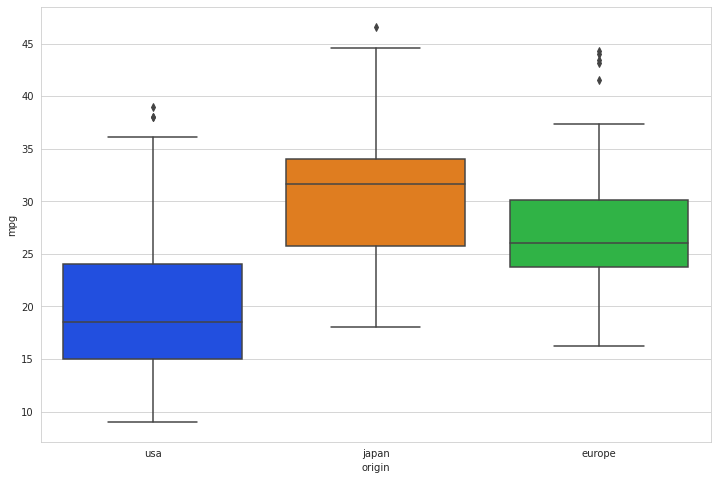

In [64]:
plt.figure(figsize=(12,8))
sns.boxplot(x="origin",y="mpg",data=data)

# MPG érték évjárattól függően

<AxesSubplot:title={'center':'MPG érték évjárattól függően'}, xlabel='model_year', ylabel='mpg'>

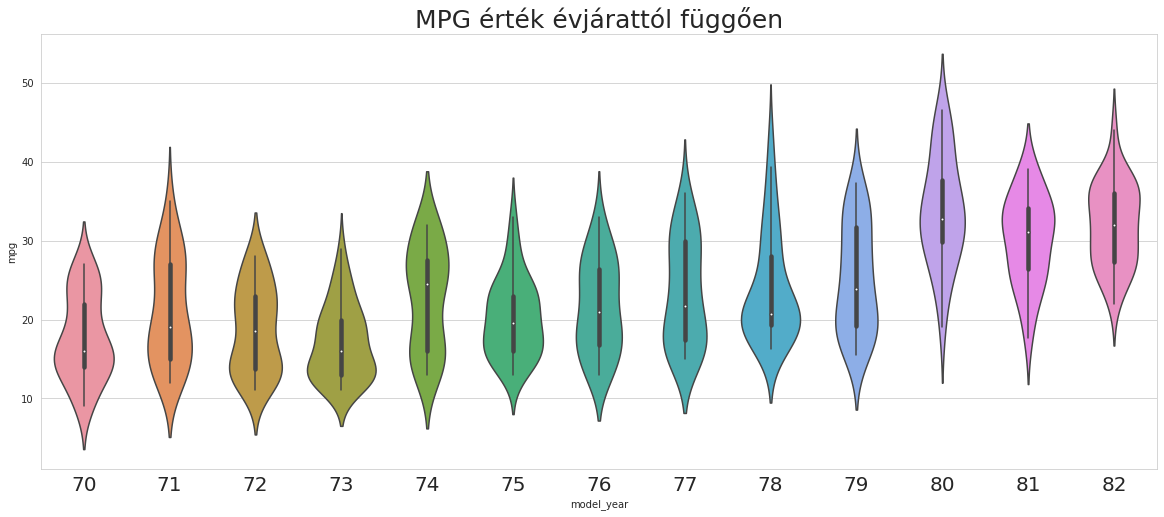

In [65]:
plt.figure(figsize=(20,8))
plt.title("MPG érték évjárattól függően",fontsize=25)
plt.xticks(fontsize=20)

sns.violinplot(x="model_year",y="mpg",data=data)

<AxesSubplot:title={'center':'MPG érték évjárattól függően'}, xlabel='model_year', ylabel='mpg'>

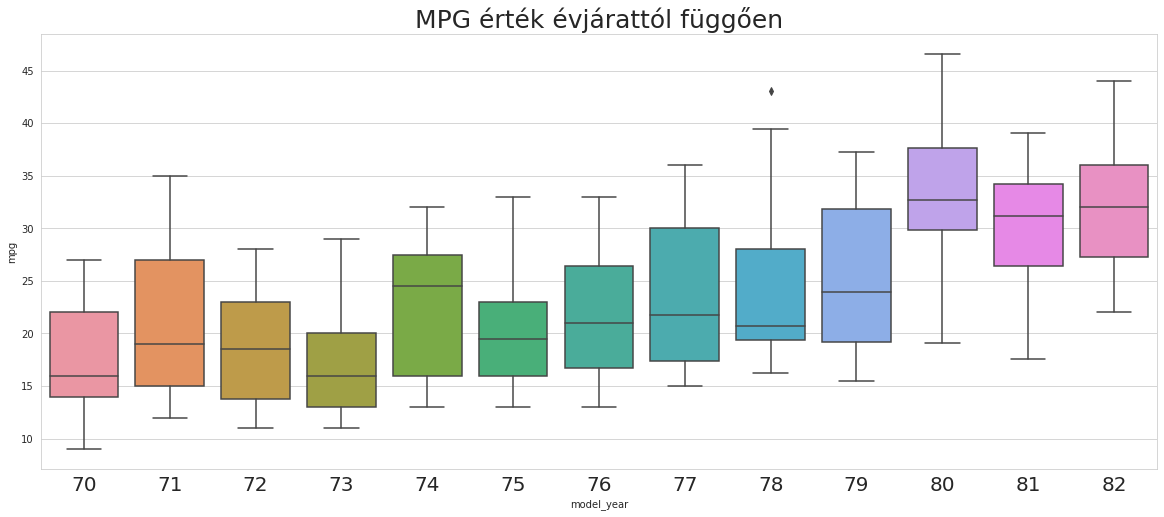

In [66]:
plt.figure(figsize=(20,8))
plt.title("MPG érték évjárattól függően",fontsize=25)
plt.xticks(fontsize=20)

sns.boxplot(x="model_year",y="mpg",data=data)

# MPG vs Márka

<AxesSubplot:title={'center':'Mpg érték minden márkára'}, xlabel='marka', ylabel='mpg'>

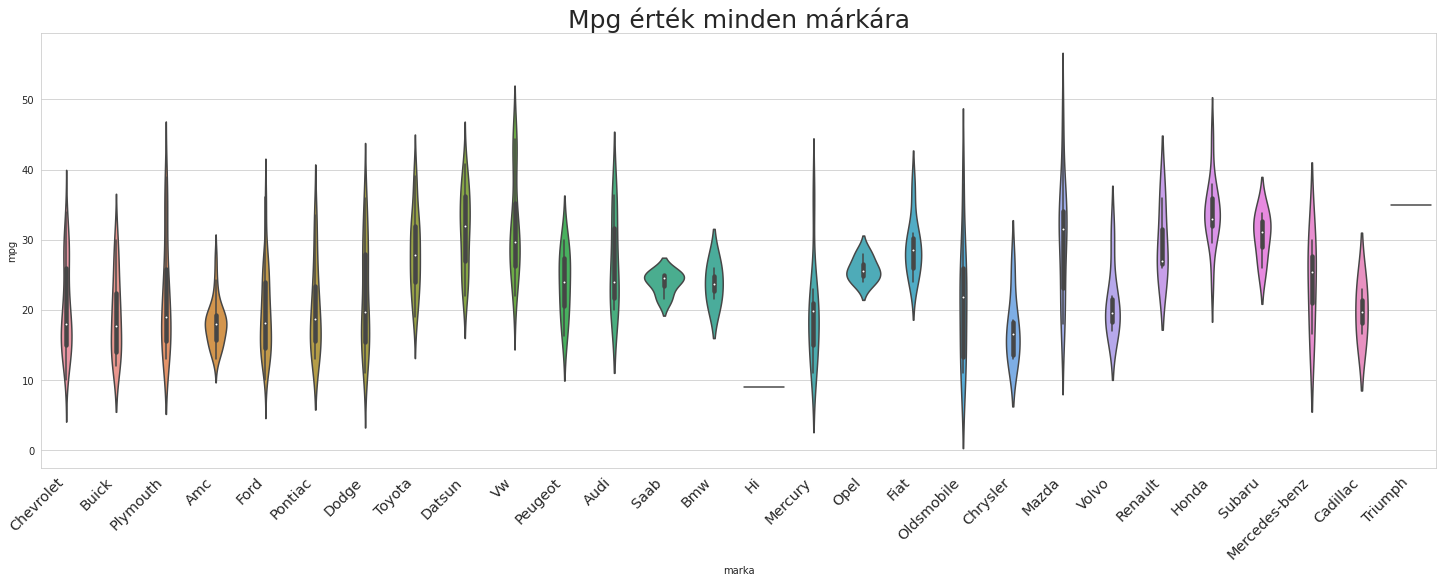

In [67]:
plt.figure(figsize=(25,8))
plt.title("Mpg érték minden márkára",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')


sns.violinplot(x="marka",y="mpg",data=data)

<AxesSubplot:title={'center':'Mpg érték minden márkára'}, xlabel='marka', ylabel='mpg'>

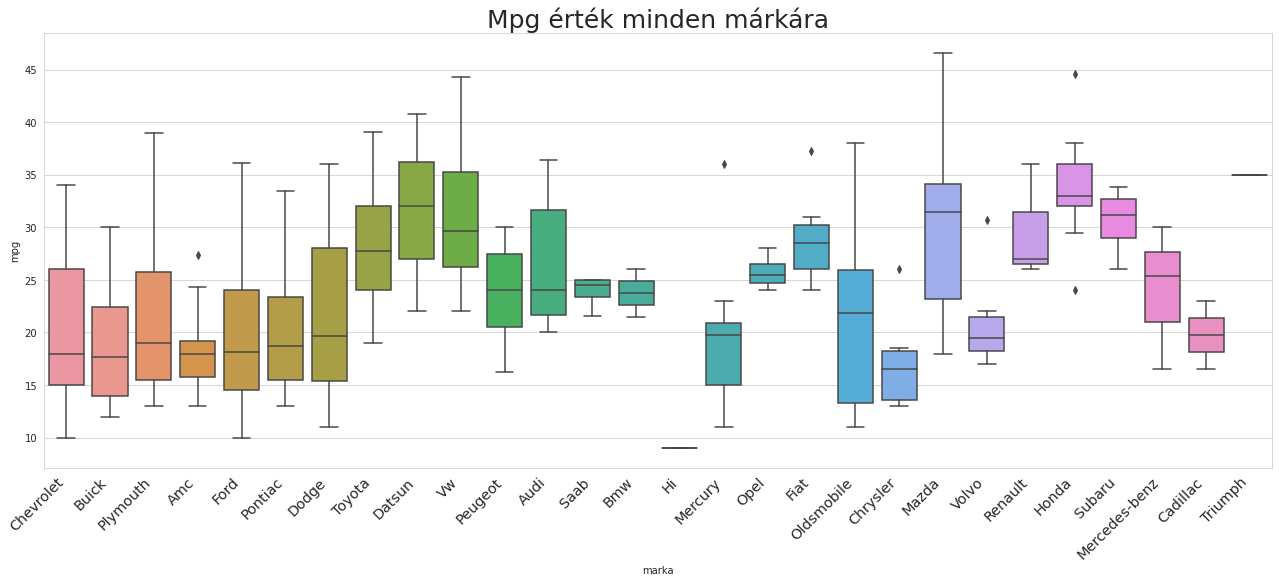

In [68]:
plt.figure(figsize=(22,8))
plt.title("Mpg érték minden márkára",fontsize=25)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')


sns.boxplot(x="marka",y="mpg",data=data)

# MPG vs Hengerek

<AxesSubplot:title={'center':'MPG érték hengerek számától függően'}, xlabel='cylinders', ylabel='mpg'>

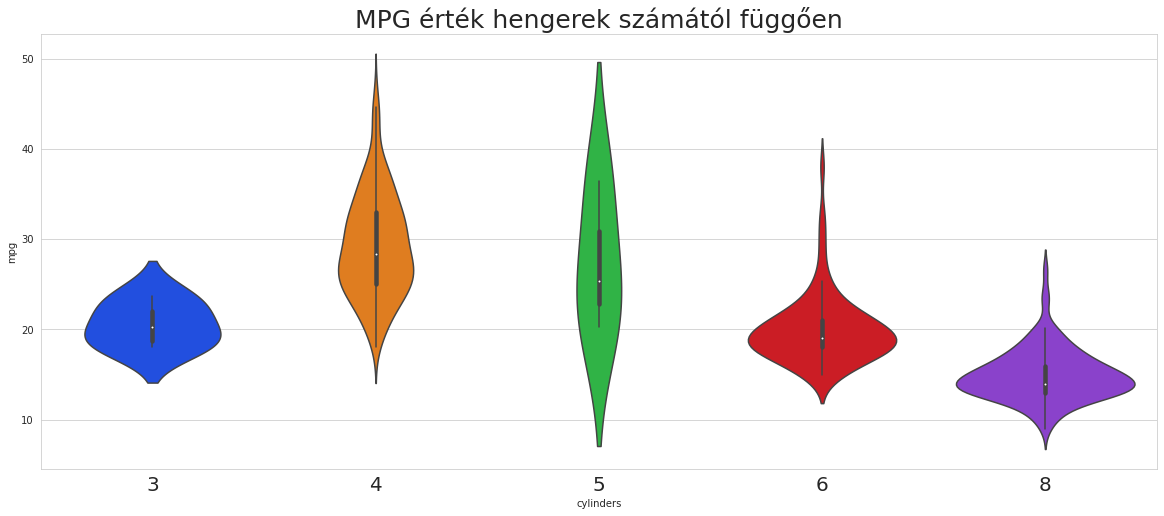

In [69]:
plt.figure(figsize=(20,8))
plt.title("MPG érték hengerek számától függően",fontsize=25)
plt.xticks(fontsize=20)

sns.violinplot(x="cylinders",y="mpg",data=data)

<AxesSubplot:title={'center':'MPG érték hengerek számától függően'}, xlabel='cylinders', ylabel='mpg'>

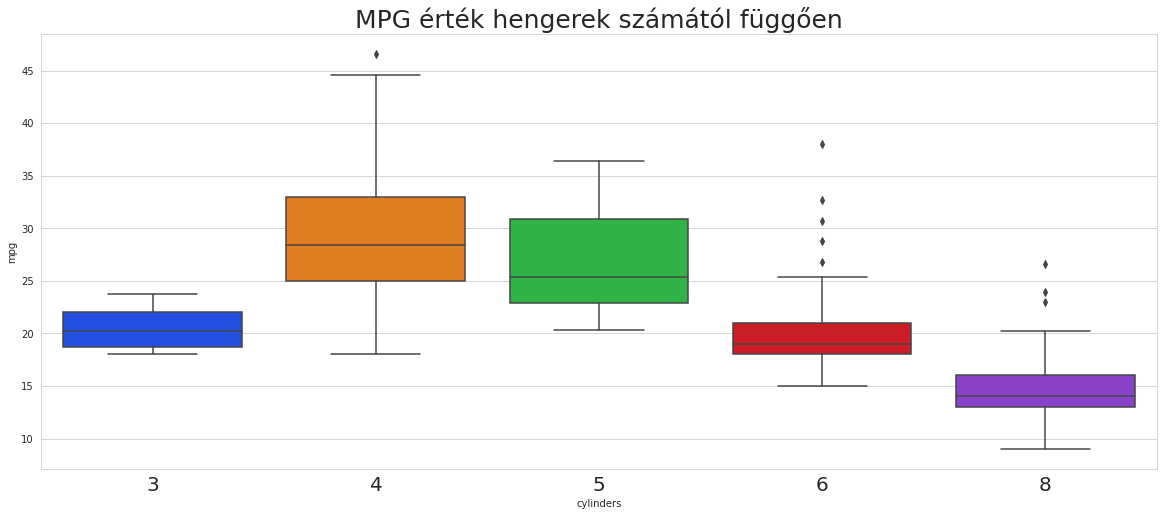

In [70]:
plt.figure(figsize=(20,8))
plt.title("MPG érték hengerek számától függően",fontsize=25)
plt.xticks(fontsize=20)

sns.boxplot(x="cylinders",y="mpg",data=data)

# Heat map az adatok korrelációjának szemlélteséhéz

<AxesSubplot:>

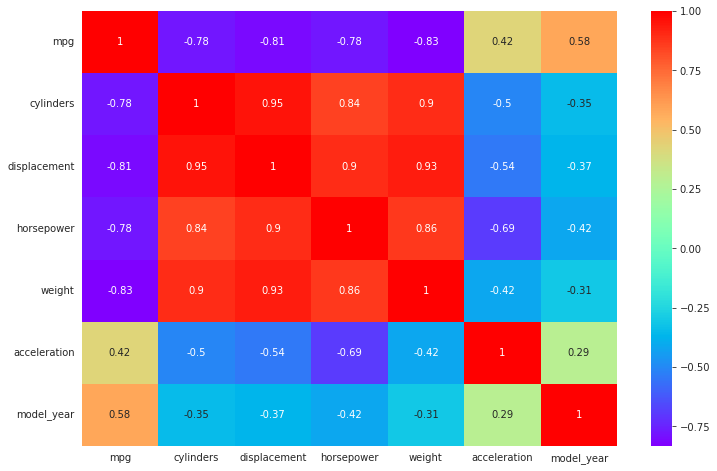

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap="rainbow")

# Cluster Map

<Figure size 864x576 with 0 Axes>

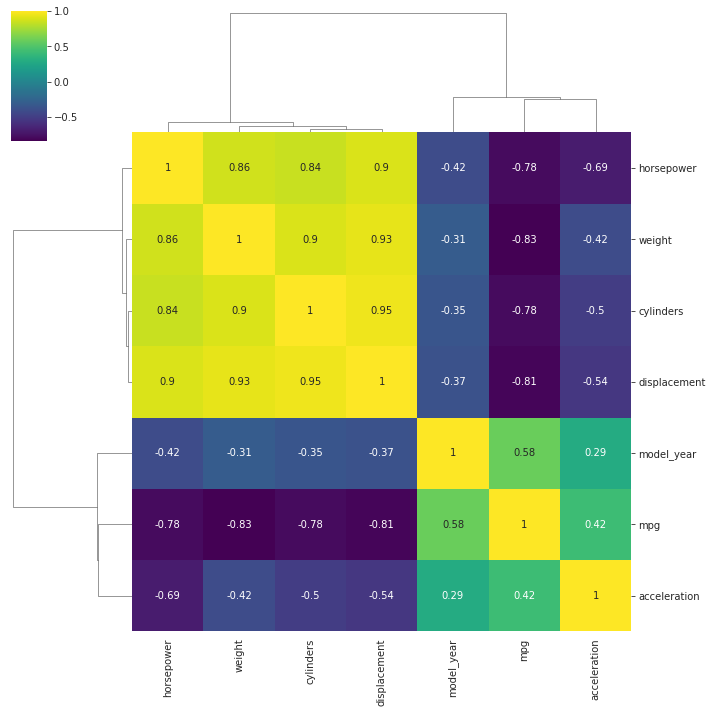

In [72]:
plt.figure(figsize=(12,8))
sns.clustermap(data.corr(),cmap="viridis",annot=True)

# Pie charts

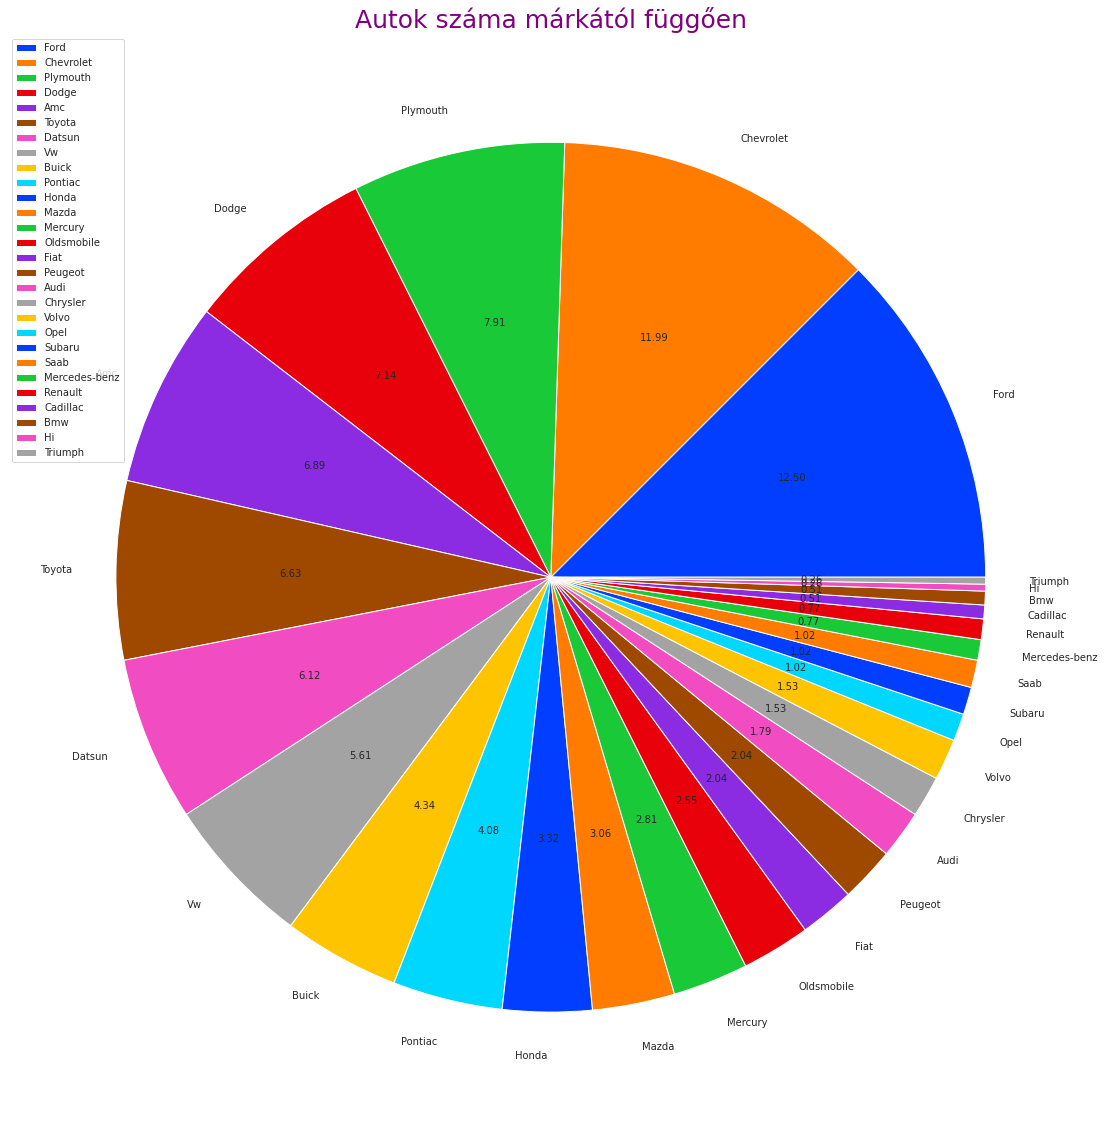

In [73]:
plt.figure(figsize=(20,20))
ax =data["marka"].value_counts()
labels=data["marka"].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Autok száma márkától függően",fontsize=25,color='purple')
plt.legend()
plt.show()

# A Fordnak van a legtöbb autója

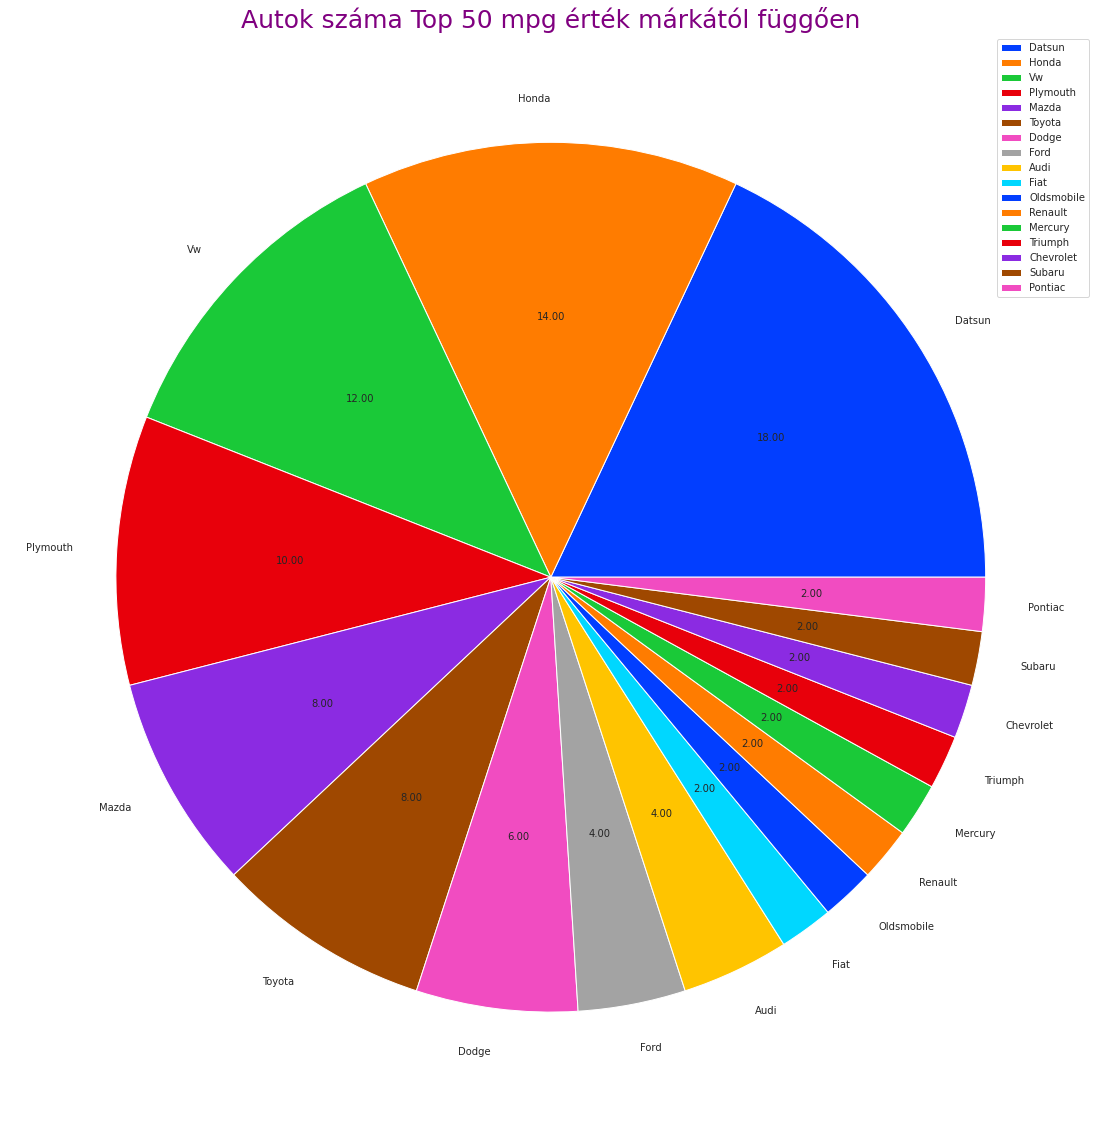

In [74]:
plt.figure(figsize=(20,20))
ax =data.sort_values(by="mpg",ascending=False)["marka"][:50].value_counts()
labels=data.sort_values(by="mpg",ascending=False)["marka"][:50].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Autok száma Top 50 mpg érték márkától függően",fontsize=25,color='purple')
plt.legend()
plt.show()

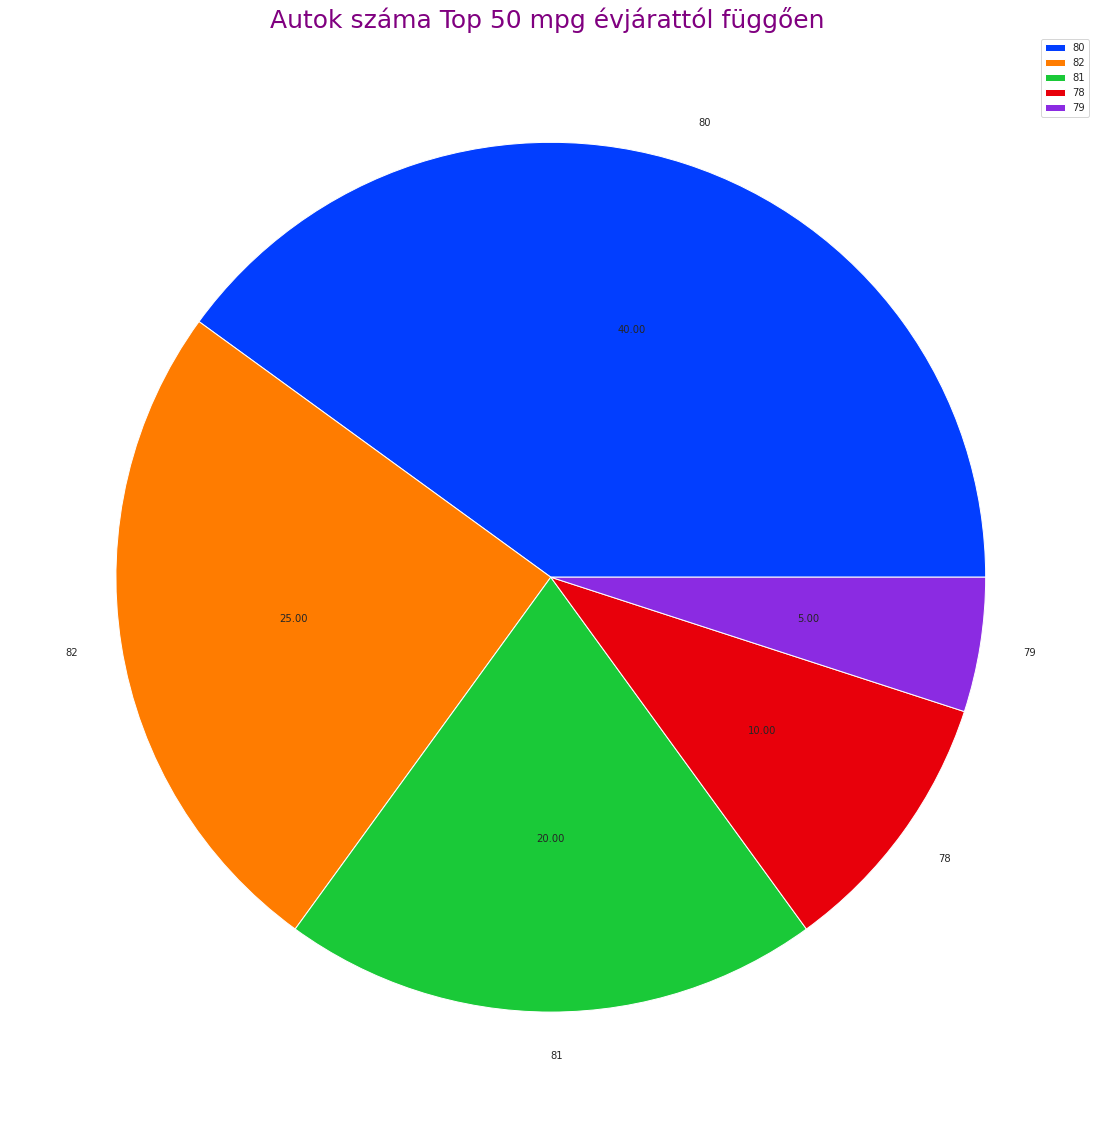

In [75]:
plt.figure(figsize=(20,20))
ax =data.sort_values(by="mpg",ascending=False)["model_year"][:20].value_counts()
labels=data.sort_values(by="mpg",ascending=False)["model_year"][:20].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Autok száma Top 50 mpg évjárattól függően ",fontsize=25,color='purple')
plt.legend()
plt.show()

# A 80-as modellévű autókól került ki az 50 legjobb mpg értékkel rendelkező autó

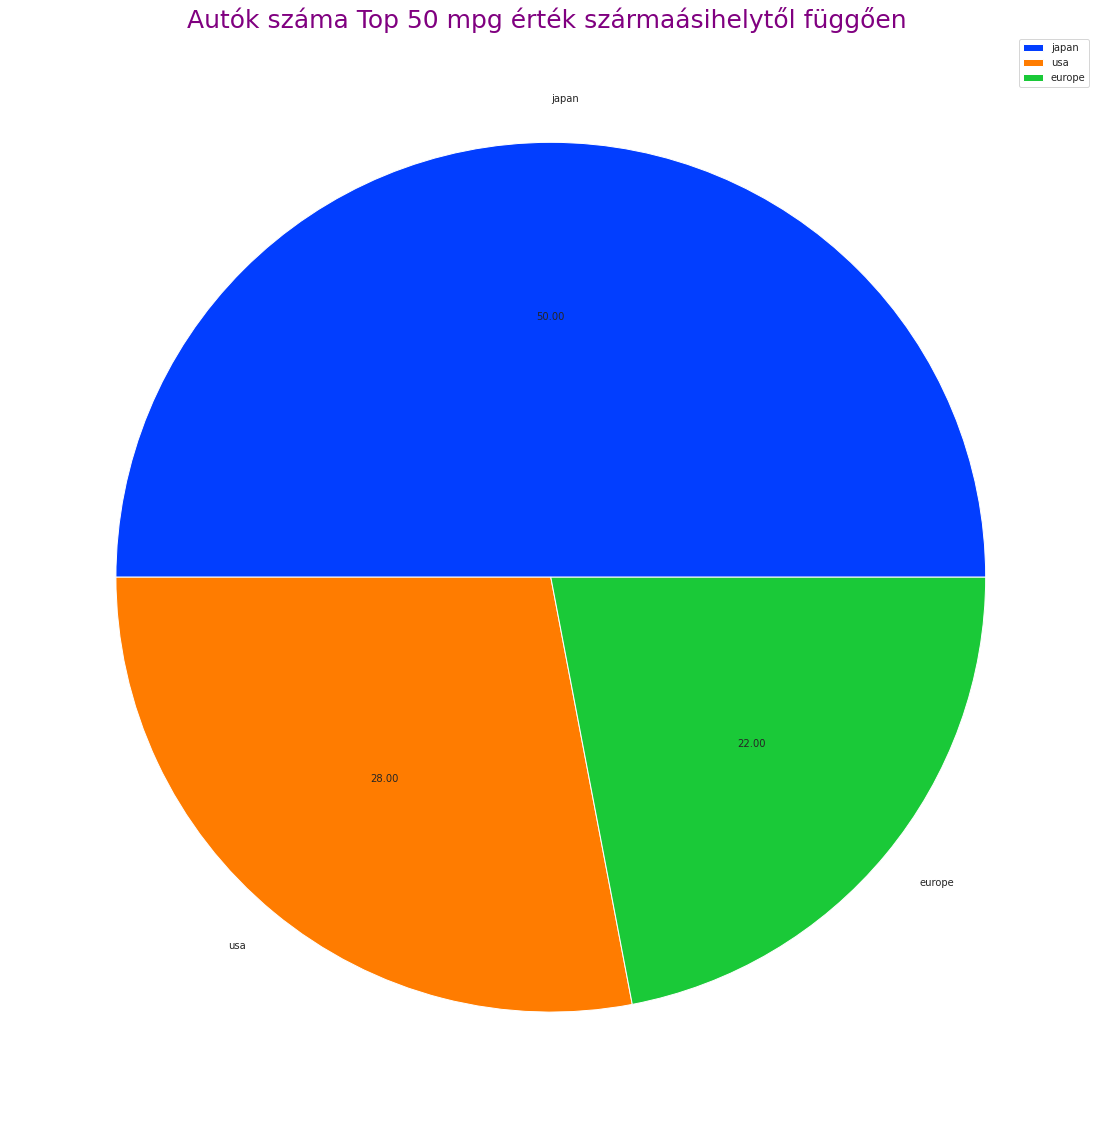

In [76]:
plt.figure(figsize=(20,20))
ax =data.sort_values(by="mpg",ascending=False)["origin"][:50].value_counts()
labels=data.sort_values(by="mpg",ascending=False)["origin"][:50].value_counts().index

plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Autók száma Top 50 mpg érték szármaásihelytől függően ",fontsize=25,color='purple')
plt.legend()
plt.show()

# A japán autókban van a legtöbb autó az 50 legjobb Mpg értékű autóból

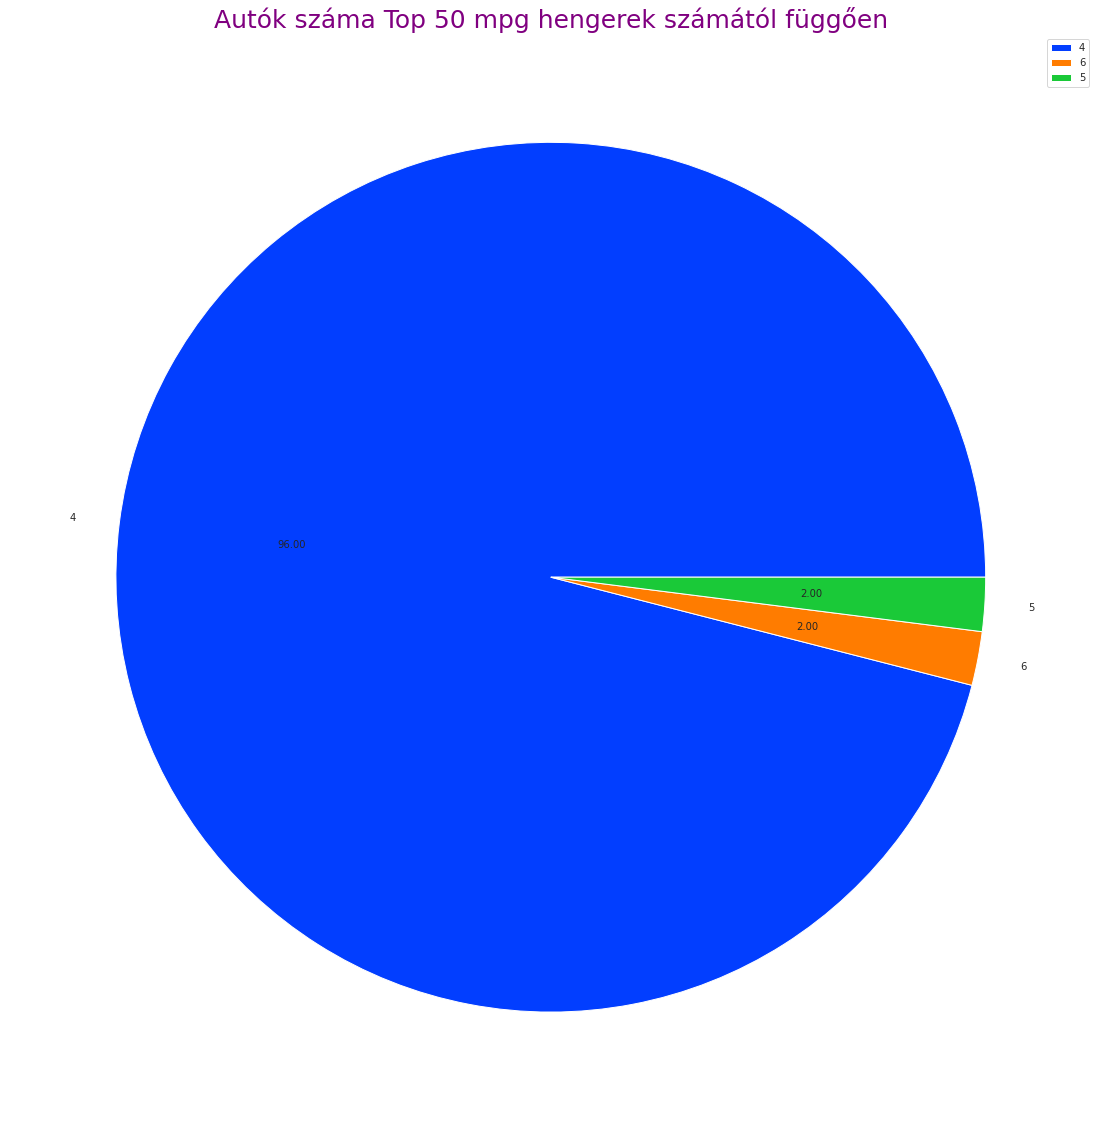

In [77]:
plt.figure(figsize=(20,20))
ax =data.sort_values(by="mpg",ascending=False)["cylinders"][:50].value_counts()
labels=data.sort_values(by="mpg",ascending=False)["cylinders"][:50].value_counts().index

plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Autók száma Top 50 mpg hengerek számától függően",fontsize=25,color='purple')
plt.legend()
plt.show()

# A 4 hengeres autókból kerül ki a legtöbb az 50 legnagyobb mpg értékkel rendelkező autók közül

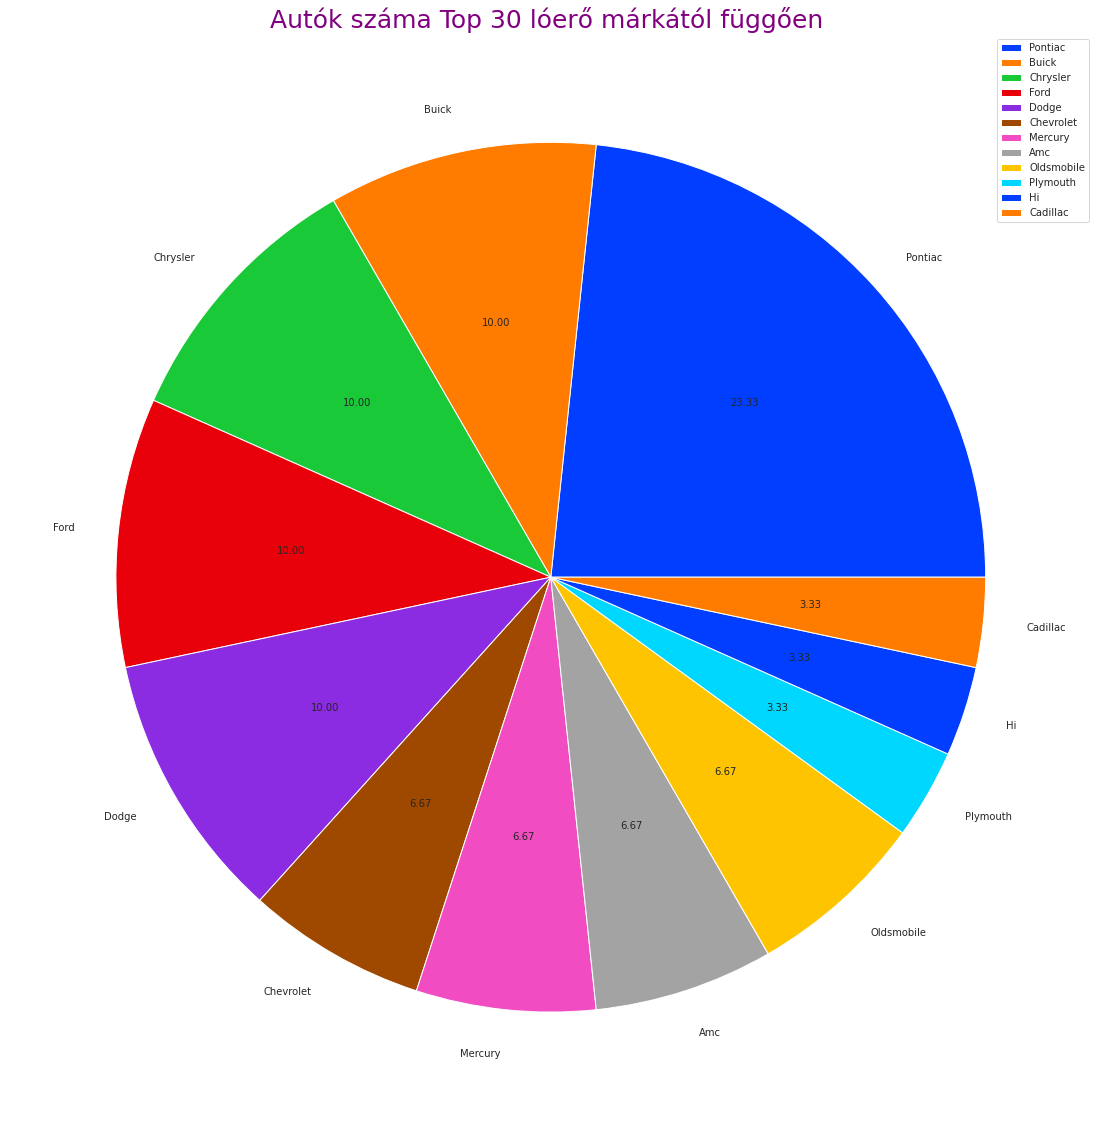

In [78]:
plt.figure(figsize=(20,20))
ax =data.sort_values(by="horsepower",ascending=False)["marka"][:30].value_counts()
labels=data.sort_values(by="horsepower",ascending=False)["marka"][:30].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Autók száma Top 30 lóerő márkától függően ",fontsize=25,color='purple')
plt.legend()
plt.show()

# Pontiacból van a legtöbb a Top 30 legnagyobb lóerővel rendelkező autók közül

# Adatok feldolgozása¶

In [79]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,marka
0,18.0,8,307.0,130.0,3504,12.0,70,usa,Chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,Buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,Plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,Amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,Ford


# X and Y értékek

# Mpg mező lesz a cél változó

In [80]:
y=data.iloc[:,0].values

In [81]:
x=data.drop("mpg",axis=1).values

In [82]:
x[:10]

array([[8, 307.0, 130.0, 3504, 12.0, 70, 'usa', 'Chevrolet'],
       [8, 350.0, 165.0, 3693, 11.5, 70, 'usa', 'Buick'],
       [8, 318.0, 150.0, 3436, 11.0, 70, 'usa', 'Plymouth'],
       [8, 304.0, 150.0, 3433, 12.0, 70, 'usa', 'Amc'],
       [8, 302.0, 140.0, 3449, 10.5, 70, 'usa', 'Ford'],
       [8, 429.0, 198.0, 4341, 10.0, 70, 'usa', 'Ford'],
       [8, 454.0, 220.0, 4354, 9.0, 70, 'usa', 'Chevrolet'],
       [8, 440.0, 215.0, 4312, 8.5, 70, 'usa', 'Plymouth'],
       [8, 455.0, 225.0, 4425, 10.0, 70, 'usa', 'Pontiac'],
       [8, 390.0, 190.0, 3850, 8.5, 70, 'usa', 'Amc']], dtype=object)

In [83]:
y[:10]

array([18., 15., 18., 16., 17., 15., 14., 14., 14., 15.])

In [84]:
x.shape

(392, 8)

In [85]:
data=pd.read_csv("mpg.csv",sep=",")

# Kategorikus adatok feldolgozása

# OneHotEncoding
1.origin x[:,6]

2.cylinders x[:,0]

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0,6])],
                    remainder="passthrough")
x_s=np.array(ct.fit_transform(x))
x_s[29]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 97.0, 88.0, 2130, 14.5, 71,
       'Datsun'], dtype=object)

In [87]:
x_s[:,8:]

array([[307.0, 130.0, 3504, 12.0, 70, 'Chevrolet'],
       [350.0, 165.0, 3693, 11.5, 70, 'Buick'],
       [318.0, 150.0, 3436, 11.0, 70, 'Plymouth'],
       ...,
       [135.0, 84.0, 2295, 11.6, 82, 'Dodge'],
       [120.0, 79.0, 2625, 18.6, 82, 'Ford'],
       [119.0, 82.0, 2720, 19.4, 82, 'Chevrolet']], dtype=object)

# **LabelEncoding**

3. évjárat x[:,12]

4. márka x[:,13]

In [88]:
from sklearn.preprocessing import LabelEncoder
le_brand=LabelEncoder()
le_year=LabelEncoder()
x_s[:,13]=le_brand.fit_transform(x_s[:,13].astype(str))
x_s[:,12]=le_year.fit_transform(x_s[:,12])
x_s[:2]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 307.0, 130.0, 3504, 12.0,
        0, 5],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 350.0, 165.0, 3693, 11.5,
        0, 3]], dtype=object)

In [89]:
newdata=pd.DataFrame(x_s,columns=["3","4","5","6","8","Europe","Japan","USA","displacement","horsepower","weight","acceleration","model_year","brand"])
newdata.head()

,3,4,5,6,8,Europe,Japan,USA,displacement,horsepower,weight,acceleration,model_year,brand
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,307.0,130.0,3504,12.0,0,5
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,350.0,165.0,3693,11.5,0,3
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,318.0,150.0,3436,11.0,0,19
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,304.0,150.0,3433,12.0,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,302.0,140.0,3449,10.5,0,10


# Az első nyolc oszlop bináris értékekkel rendelkezik, az utolsó két oszlop címkézett értékekkel rendelkezik

Train test

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.3,random_state=101)

In [91]:
x_train

array([[0.0, 0.0, 0.0, ..., 15.8, 8, 3],
       [0.0, 0.0, 0.0, ..., 12.1, 6, 4],
       [0.0, 1.0, 0.0, ..., 17.8, 11, 23],
       ...,
       [0.0, 0.0, 0.0, ..., 12.6, 11, 5],
       [0.0, 0.0, 0.0, ..., 8.0, 0, 19],
       [0.0, 1.0, 0.0, ..., 16.8, 11, 24]], dtype=object)

In [92]:
x_test.shape

(118, 14)

Feature Scaling

In [93]:
x_train[:2]

array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 231.0, 105.0, 3380, 15.8,
        8, 3],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 350.0, 180.0, 4380, 12.1,
        6, 4]], dtype=object)

In X

numerical mezők indulnak 8-tó és tartanak 11-ig

mező 8 is űrtartalom

mező 9 is lóerő

mező 10 is súly

mező 11 is gyorsulás

x[:,8:-1]

In [94]:
x_train_scaled=x_train
x_test_scaled=x_test

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled[:,8:12]=sc.fit_transform(x_train_scaled[:,8:12])
x_test_scaled[:,8:12]=sc.transform(x_test_scaled[:,8:12])
x_train_scaled

array([[0.0, 0.0, 0.0, ..., 0.031817108658544216, 8, 3],
       [0.0, 0.0, 0.0, ..., -1.2688355025524836, 6, 4],
       [0.0, 1.0, 0.0, ..., 0.7348725741780185, 11, 23],
       ...,
       [0.0, 0.0, 0.0, ..., -1.093071636172615, 11, 5],
       [0.0, 0.0, 0.0, ..., -2.710099206867406, 0, 19],
       [0.0, 1.0, 0.0, ..., 0.38334484141828135, 11, 24]], dtype=object)

# Osztályok

Linear Regression

A modell betanítása

In [96]:
from sklearn.linear_model import LinearRegression
Linreg=LinearRegression()
Linreg_fs=LinearRegression()
Linreg.fit(x_train,y_train)

LinearRegression()

Modell előrejelzés

In [97]:
P_linreg=Linreg.predict(x_test)


In [98]:
from sklearn.metrics import mean_squared_error,r2_score
mse_linreg=mean_squared_error(y_test,P_linreg)

print(np.sqrt(mse_linreg))

3.0673096362048806


In [99]:
lin_score=r2_score(y_test,P_linreg)*100
print(lin_score)

81.78091617334161


Random Forest Regression¶

A modell betanítása

In [100]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor(n_estimators=100,random_state=101)
randomforest.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

Model előrejelzés

In [101]:
P_forest=randomforest.predict(x_test)

Modell értékelése

In [102]:
forest_score=r2_score(y_test,P_forest)*100
print(forest_score)

87.52612177482055


Elastic net Regression¶

Modell betanítása

In [103]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(x_train,y_train)

ElasticNet()

Model előre jelzés

In [104]:
P_elastic=elastic.predict(x_test)

Modell értékelése

In [105]:
elastic_score=r2_score(y_test,P_elastic)*100
print(elastic_score)

75.51290444533024


# Model Selection

In [127]:
Score=pd.DataFrame({"Model_neve":["Linear Regression","Elastic Net Regression","Random Forest"],
                   "Érték":[lin_score,elastic_score,forest_score]})

In [128]:
Score

,Model_neve,Érték
0,Linear Regression,81.780916
1,Elastic Net Regression,75.512904
2,Random Forest,87.526122


Amint az a fenti adatokból látható, "Random Forest" adta vissza a legmagasabb pontszámot

Sajátosságok fontossága

In [108]:
Feature_importance=pd.DataFrame(randomforest.feature_importances_,index=["3","4","5","6","8","Europe","Japan","USA","displacement","horsepower","weight","acceleration","model_year","brand"])
Feature_importance[8:]

,0
displacement,0.222096
horsepower,0.119719
weight,0.367571
acceleration,0.030325
model_year,0.121213
brand,0.011502


# Arra jutottam, hogy egy autó üzemanyag-fogyasztását leginkább az autó lökettérfogata és súlya befolyásolja

In [124]:
sample=pd.DataFrame({"Jelenlegi mpg":y_test,
             "Elvárt mpg":np.round(P_forest,2)})

In [125]:
sample

,Jelenlegi mpg,Elvárt mpg
0,14.0,12.97
1,17.0,18.02
2,21.0,18.96
3,33.5,31.80
4,18.0,17.25
...,...,...
113,33.0,31.79
114,18.0,20.11
115,12.0,11.76
116,25.0,25.54


# Amint látható, modellünk jól működik, az előre jelzett Mpg közel a tényleges Mpg-hez

In [126]:
sample.to_csv("ModelPelda.csv",index=False)